<a target="_blank" href="https://colab.research.google.com/github/ares2012/temp/blob/master/crawling.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

https://openincolab.com

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##### Google search

https://jungwoon.github.io/python/2018/03/20/Data-Analysis-With-Python-3.html

In [1]:
!pip install googlesearch-python --upgrade --quiet

In [2]:
import ssl

context = ssl._create_unverified_context()
ssl._create_default_https_context = ssl._create_unverified_context

In [47]:
import urllib.request
from bs4 import BeautifulSoup


kw = urllib.parse.quote("중조")
kw = 'sodium+bicarbonate+manufacturers+in+southeast+asia'

url = 'https://google.com/search?q='+kw
print(url, urllib.parse.unquote(kw))

# Perform the request
request = urllib.request.Request(url)

# Set a normal User Agent header, otherwise Google will block the request.
request.add_header('User-Agent', 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36')
raw_response = urllib.request.urlopen(request, context=context).read()

# Read the repsonse as a utf-8 string
html = raw_response.decode("utf-8")
html

soup = BeautifulSoup(html, "html.parser")
soup.text, #soup.prettify(), soup.p['class'], soup.b.prettify()

https://google.com/search?q=sodium+bicarbonate+manufacturers+in+southeast+asia sodium+bicarbonate+manufacturers+in+southeast+asia


("Google Search如果系統沒有在數秒鐘後將您重新導向，請按一下這裡。If you're having trouble accessing Google Search, pleaseclick here, or sendfeedback.",)

In [7]:
from googlesearch import search

proxy = 'http://API:@proxy.host.com:8080/'

j = search("proxy test", num_results=100, lang="en", proxy=proxy, ssl_verify=False)
for i in j:
    print(i)

TypeError: search() got an unexpected keyword argument 'num_results'

In [48]:
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [49]:
from googlesearch import search
from bs4 import BeautifulSoup
import requests

import pandas as pd

query = 'sodium bicarbonate manufacturers in southeast asia'
urls = []
for url in search(query, num_results=10, advanced=True):
#for url in search(query):
  urls.append(url)

urls#, urls[0].url, urls[0].title, urls[0].description

[SearchResult(url=https://www.marketresearchfuture.com/reports/southeast-asia-sodium-bicarbonate-market/companies, title=Southeast Asia Sodium Bicarbonate Companies, description= Key Players: ),
 SearchResult(url=https://www.solvay.com/en/press-release/solvay-inaugurates-south-east-asias-largest-sodium-bicarbonate-plant, title=Solvay inaugurates South-East Asia's largest sodium bicarbonate ..., description= Sep 15, 2015  ·  Solvay inaugurates South-East Asia's largest sodium bicarbonate plant based in Thailand to meet growing demand for high-quality products. ),
 SearchResult(url=https://www.solvay.com/en/thailand, title=Solvay in Thailand | Solvay, description= Solvay has established the world largest plant of Hydrogen Peroxide and the South-East Asia's largest plant of Sodium Bicarbonate. Solvay develops high-added- ... ),
 SearchResult(url=https://orcchem.com.my/products/sodium-bicarbonate-supplier-selangor-malaysia/, title=Sodium Bicarbonate Supplier in Selangor, Malaysia - Orc Che

In [14]:
urls

['http://www.bubblebank.net/shop/shopdetail.html?branduid=207',
 'https://namu.wiki/w/%ED%83%84%EC%82%B0%EC%88%98%EC%86%8C%20%EB%82%98%ED%8A%B8%EB%A5%A8',
 'https://namu.wiki/w/%EC%A4%91%EC%A1%B0',
 'https://blog.naver.com/hkwoo618/222132447138?viewType=pc',
 'https://doctornow.co.kr/content/qna/90941730b21f4c43bb4e4f37eca55dc3',
 'http://www.dainsoap.co.kr/m/product.html?branduid=231',
 'https://m.blog.naver.com/dschem0801/221717591820',
 'https://degrasse.co.kr/product/%EC%A4%91%EC%A1%B0-%EB%B2%A0%EC%9D%B4%ED%82%B9%EC%86%8C%EB%8B%A4-%ED%83%84%EC%82%B0%EC%88%98%EC%86%8C%EB%82%98%ED%8A%B8%EB%A5%A8/435/',
 'https://www.nongsaro.go.kr/portal/ps/psz/psza/contentSub.ps?menuId=PS00078&cntntsNo=211572&totalSearchYn=Y',
 'https://www.chemicalbook.com/ChemicalProductProperty_KR_CB7492884.htm',
 'http://www.daemyungchem.co.kr/shop/goods/goods_view.php?goodsno=666&category=',
 'https://m.gmarket.co.kr/n/search?keyword=%EC%A4%91%EC%A1%B0&t=a&kvt=1&s=8',
 'https://ko.wikipedia.org/wiki/%EC%A4%91%E

In [51]:
'''불필요'''

crawl_rst = dict()
crawl_list = list()
for url in urls[:]:
  #print(url.url)
  if (url.url).startswith('https://'):
    try:
      with requests.get(url.url, verify=False, timeout=3, stream=True) as url_result:
        html = url_result.text
        soup = BeautifulSoup(html, "html.parser")
        text = soup.get_text()
        #print(soup.title)
        tt = ''
        if soup.title is not None:
          tt = soup.title.string
          #print(soup.title.find_all(string=True))
        #soup.b.prettify()
        crawl_rst['title']=tt
        crawl_rst['url']=url
        crawl_list.append(crawl_rst.copy())
        #print(crawl_list)
    except requests.exceptions.ReadTimeout:
      print ("READ TIMED OUT -", url)

df=pd.DataFrame(crawl_list)
df

TypeError: 'dict' object is not callable

##### Selenium in colab

In [1]:
# 느낌표를 붙이면 Shell 명령어로 실행됩니다.
!python --version

# Selenium을 확인하려면 다음과 같이 사용해야 합니다.
import selenium
print(selenium.__version__)

Python 3.11.11


ModuleNotFoundError: No module named 'selenium'

In [2]:
!pip install selenium --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 26.5 MB/s eta 0:00:00


In [3]:
# 코랩을 시작할 때 아래코드를 한 번 돌려줍니다.
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,892 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,737 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-secur

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

In [ ]:
# WebDriverException: Message: Service /usr/bin/chromedriver unexpectedly exited. Status code was: 1

service = Service(executable_path=r'/usr/bin/chromedriver')

options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome('chromedriver', options=options)
driver = webdriver.Chrome(service=service, options=options)

In [5]:
!pip install chromedriver-autoinstaller --upgrade --quiet

In [6]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [7]:
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')  # set path to chromedriver as per your configuration
chrome_options.add_argument('lang=ko_KR') # 한국어
chrome_options.headless = True

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()

# set the target URL
url = "put-url-here-to-scrape"

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [8]:
url = "https://www.google.com/"  # set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

# driver 작동 테스트
driver.get(url)
driver.implicitly_wait(3) # element가 로드될 때까지 지정한 시간만큼 대기할 수 있도록 설정
# driver.get_screenshot_as_file('google_screen.png')
title = driver.title
#driver.close()

print(title, driver)

Google <selenium.webdriver.chrome.webdriver.WebDriver (session="5c28faf79372d7e5d20dc6483a18bf52")>


##### google with Selenium

In [ ]:
# 클릭하기
driver.find_element(By.XPATH,'//*[@id="APjFqb"]').click()

driver.save_screenshot('click.png')

In [ ]:
# 값 입력하기
driver.find_element(By.XPATH,'//*[@id="APjFqb"]').send_keys("tistory")

driver.save_screenshot('tistory.png')

In [ ]:
# 키보드 입력하기
driver.find_element(By.XPATH,'//*[@id="APjFqb"]').send_keys("tistory")
#driver.find_element(By.XPATH,'//*[@id="APjFqb"]').send_keys(Keys.ENTER)
driver.find_element(By.XPATH,'//*[@id="APjFqb"]').send_keys(Keys.RETURN)

driver.save_screenshot('enter.png') #둘다 안먹힘

In [ ]:
clk = driver.find_element(By.NAME, 'q')
clk.send_keys("naver")
clk.submit()
time.sleep(3)

driver.save_screenshot('naver.png')

#로봇이 아닙니다.

In [ ]:
# 자원회수 - 코드 실행 마지막에 quit driver
driver.quit()

In [ ]:
print(driver.window_handles)
print(driver.current_window_handle)

In [ ]:
#service = Service(executable_path=r'.chromedriver.exe')
url = "https://www.google.com/"  # set up the webdriver
driver = webdriver.Chrome()

# driver 작동 테스트
driver.get(url)

clk = driver.find_element(By.NAME, 'q')
clk.send_keys("naver")
clk.submit()

#로봇이 아닙니다.

In [ ]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html)

v = soup.select('.yuRUbf')
v

In [ ]:
for i in v:
    print(i.select_one('.LC20lb.DKV0Md').text)
    print(i.a.attrs['href'])
    print()

print('done')

#driver.close()

In [ ]:
def selenium_scroll_option():
  SCROLL_PAUSE_SEC = 3

  # 스크롤 높이 가져옴
  last_height = driver.execute_script("return document.body.scrollHeight")

  while True:
    # 끝까지 스크롤 다운
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # 10초 대기
    time.sleep(SCROLL_PAUSE_SEC)

    # 스크롤 다운 후 스크롤 높이 다시 가져옴
    new_height = driver.execute_script("return document.body.scrollHeight")

    if new_height == last_height:
        break
    last_height = new_height

In [ ]:
courbet = "/content/drive/MyDrive/Colab Notebooks/"

# 키워드 검색하기

base_url = "https://www.google.co.kr/imghp?hl=ko" # 구글 이미지 검색
keyword = input("검색할 키워드를 입력 : ")
# print(type(a))
image_name = input("저장할 이미지 이름 : ")


driver = webdriver.Chrome(options=chrome_options)
driver.get(base_url)

# driver.find_element("xpath",'//*[@id="APjFqb"]') # 검색창 /html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea
# browser = driver.find_element(By.ID, "APjFqb")

browser =  driver.find_element(By.NAME, "q")
browser.clear()
browser.send_keys(keyword)
browser.send_keys(Keys.RETURN)


# 클래스를 찾고 해당 클래스의 src 리스트를 만들자
selenium_scroll_option() # 스크롤하여 이미지를 많이 확보
#driver.find_elements_by_xpath('//*[@id="islmp"]/div/div/div/div/div[3]/div[2]/input')[0].click() # 이미지 더보기 클릭
#selenium_scroll_option()

'''이미지 src요소를 리스트업해서 이미지 url 저장'''

images = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd") #  클래스 네임에서 공백은 .을 찍어줌
images_url = []
for i in images:
    if i.get_attribute('src')!= None :
        images_url.append(i.get_attribute('src'))
    else :
        images_url.append(i.get_attribute('data-src'))
driver.close()

# 겹치는 이미지 url 제거
print(len(pd.DataFrame(images_url)))
print("전체 다운로드한 이미지 개수: {}\n동일한 이미지를 제거한 이미지 개수: {}".format(len(images_url), len(pd.DataFrame(images_url)[0].unique())))
images_url=pd.DataFrame(images_url)[0].unique()

#'''해당하는 파일에 이미지 다운로드'''
#
if image_name == 'shark' :
   for t, url in enumerate(images_url, 0):
      urlretrieve(url, shark + image_name + '_' + str(t) + '.jpg')
   driver.close()
#
#elif image_name == 'whale' :
#   for t, url in enumerate(images_url, 0):
#      urlretrieve(url, whale + image_name + '_' + str(t) + '.jpg')
#   driver.close()
#
#elif image_name == 'dolphin' :
#   for t, url in enumerate(images_url, 0):
#      urlretrieve(url, dolphin + image_name + '_' + str(t) + '.jpg')
#   driver.close()

##### Google News

In [9]:
!pip install GoogleNews --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 7.3 MB/s eta 0:00:00


In [10]:
!pip install newspaper3k --upgrade --quiet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 7.4 MB/s eta 0:00:00


In [11]:
!pip install lxml lxml_html_clean  --upgrade --quiet

In [12]:
from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd

#search_term = "sodium bicarbonate manufacturers in southeast asia"
search_term = "중조"

googlenews=GoogleNews()
googlenews.set_time_range('01/01/2024','12/31/2024')
googlenews.set_lang('ko')
#googlenews.set_period('7d')
googlenews.set_encode('utf-8')
#googlenews.set_topic('CAAqKggKIiRDQkFTRlFvSUwyMHZNRFp1ZEdvU0JYQjBMVUpTR2dKQ1VpZ0FQAQ')
#googlenews.set_section('CAQiS0NCQVNNZ29JTDIwdk1EWnVkR29TQlhCMExVSlNHZ0pDVWlJT0NBUWFDZ29JTDIwdk1ESjJlRFFxQ3dvSkVnZEdkWFJsWW05c0tBQSouCAAqKggKIiRDQkFTRlFvSUwyMHZNRFp1ZEdvU0JYQjBMVUpTR2dKQ1VpZ0FQAVAB')

googlenews.get_news(search_term)

result=googlenews.result()
df=pd.DataFrame(result)

'''
for i in range(2,20):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)
'''

df.head()

,title,desc,date,datetime,link,img,media,site,reporter
0,"중 외교부, “‘중조관계 어떻다’는 한국 매체 보도는 소설”",None,2024. 7. 10.,NaN,https://news.google.com/read/CBMibkFVX3lxTE9ZQ...,https://news.google.com/api/attachments/CC8iK0...,통일뉴스,None,None
1,"""다른 제조번호도 추가 회수""...씨엠지 등 중조단 후속조치",None,2024. 6. 19.,NaN,https://news.google.com/read/CBMib0FVX3lxTE9QS...,https://news.google.com/api/attachments/CC8iK0...,뉴스더보이스헬스케어,None,None
2,바이넥스 점안액 균 검출 논란 수사 착수하나,None,2024. 2. 14.,NaN,https://news.google.com/read/CBMiTEFVX3lxTE5pd...,https://news.google.com/api/attachments/CC8iK0...,데일리팜,None,None
3,"中 자오러지, '북중우호의 해' 개막식 참석…""중조친선, 새로운 장 써나가자""",None,2024. 4. 12.,NaN,https://news.google.com/read/CBMiYEFVX3lxTFBBO...,https://news.google.com/api/attachments/CC8iK0...,네이트 뉴스,None,None
4,"식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”",None,2024. 2. 14.,NaN,https://news.google.com/read/CBMiZ0FVX3lxTFBZb...,https://news.google.com/api/attachments/CC8iK0...,의약뉴스,None,None


In [45]:
googlenews.get_links()

[]

In [206]:
df['site'][0]='1'

<ipython-input-206-ef87df1ddbb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['site'][0]='1'


In [13]:
pip install googlenewsdecoder --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 42.5 MB/s eta 0:00:00


In [14]:
from googlenewsdecoder import gnewsdecoder

interval_time = 1  # interval is optional, default is None

source_url = googlenews.get_links()[0]

for ind in df.index:

  try:
      decoded_url = gnewsdecoder(df['link'][ind], interval=interval_time)

      if decoded_url.get("status"):
          #print("Decoded URL:", decoded_url["decoded_url"])
          df.loc[ind, 'site'] = decoded_url["decoded_url"]
      else:
          print("Error:", decoded_url["message"])
  except Exception as e:
      print(f"Error occurred: {e}")

df.head()

,title,desc,date,datetime,link,img,media,site,reporter
0,"중 외교부, “‘중조관계 어떻다’는 한국 매체 보도는 소설”",None,2024. 7. 10.,NaN,https://news.google.com/read/CBMibkFVX3lxTE9ZQ...,https://news.google.com/api/attachments/CC8iK0...,통일뉴스,https://www.tongilnews.com/news/articleView.ht...,None
1,"""다른 제조번호도 추가 회수""...씨엠지 등 중조단 후속조치",None,2024. 6. 19.,NaN,https://news.google.com/read/CBMib0FVX3lxTE9QS...,https://news.google.com/api/attachments/CC8iK0...,뉴스더보이스헬스케어,https://www.newsthevoice.com/news/articleView....,None
2,바이넥스 점안액 균 검출 논란 수사 착수하나,None,2024. 2. 14.,NaN,https://news.google.com/read/CBMiTEFVX3lxTE5pd...,https://news.google.com/api/attachments/CC8iK0...,데일리팜,https://m.dailypharm.com/News/308805,None
3,"中 자오러지, '북중우호의 해' 개막식 참석…""중조친선, 새로운 장 써나가자""",None,2024. 4. 12.,NaN,https://news.google.com/read/CBMiYEFVX3lxTFBBO...,https://news.google.com/api/attachments/CC8iK0...,네이트 뉴스,https://news.nate.com/view/20240412n33609?mid=...,None
4,"식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”",None,2024. 2. 14.,NaN,https://news.google.com/read/CBMiZ0FVX3lxTFBZb...,https://news.google.com/api/attachments/CC8iK0...,의약뉴스,http://www.newsmp.com/news/articleView.html?id...,None


In [15]:
from newspaper import Config
import nltk
nltk.download('punkt_tab')

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 3
#config.http_success_only = False

list=[]
for ind in df.index[:]:
    dict={}
    news_url = df['site'][ind].split('&')[0]
    try:
        article = Article(news_url, config=config)
        #response = requests.get(news_url, verify=False)
        #article.download(input_html=response.text)
        article.download()
        article.parse()
        article.nlp()
        dict['Date']=df['date'][ind]
        dict['Media']=df['media'][ind]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        list.append(dict)
    except: # ssl error
        print(ind)
        #pass

        driver.get(news_url)
        article.download(input_html=driver.page_source)
        article.parse()
        article.nlp()
        dict['Date']=df['date'][ind]
        dict['Media']=df['media'][ind]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        if article.text == '':
          try:
            #article=driver.find_element(By.CLASS_NAME, 'articlePage')
            #article=driver.find_element(By.CLASS_NAME, 'article_container')
            article=driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/div[2]/div[2]/div[1]/div/div[1]/div[1]/div[8]/div/div/div/div')
            dict['Article']=article.text
          except:
            pass

        list.append(dict)


news_df=pd.DataFrame(list)
news_df.to_csv("articles_중조(2024).csv")

news_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


20


,Date,Media,Title,Article,Summary
0,2024. 7. 10.,통일뉴스,"중 외교부, “‘중조관계 어떻다’는 한국 매체 보도는 소설”",9일 브리핑하는 린젠 중국 외교부 대변인. [사진 갈무리-중 외교부]\n\n“최근 ...,9일 브리핑하는 린젠 중국 외교부 대변인.\n“나는 관련 매체가 전문적 수준을 가지...
1,2024. 6. 19.,뉴스더보이스헬스케어,"""다른 제조번호도 추가 회수""...씨엠지 등 중조단 후속조치",지난해 6월 '허가사항과 다르게 제조'로 회수조치...테라젠이텍스도 대상 포함\n\...,지난해 '허가(신고)사항과 다르게 제조한 의약품'이 적발되면서 회수조치된 씨엠지제약...
2,2024. 2. 14.,데일리팜,[데일리팜] 바이넥스 점안액 균 검출 논란 수사 착수하나,,
3,2024. 4. 12.,네이트 뉴스,"中 자오러지, '북중우호의 해' 개막식 참석…""중조친선, 새로운 장 써나가자"" : ...",\n\n[평양=AP/뉴시스] 중국 서열 3위인 자오러지 전국인민대표대회(전인대) 상...,[평양=AP/뉴시스] 중국 서열 3위인 자오러지 전국인민대표대회(전인대) 상무위원장...
4,2024. 2. 14.,의약뉴스,"식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”",징역 3년 이상 피의자 대상...관련 기준 마련\n\n[의약뉴스] 식품의약품안전처가...,징역 3년 이상 피의자 대상...관련 기준 마련[의약뉴스] 식품의약품안전처가 불법 ...
5,2024. 2. 14.,메디파나 뉴스,메디파나 뉴스,"의약전문 온라인\n\n인터넷뉴스 메디파나\n\n국내 보건의약계와 일반 건강, 질병,...","의약전문 온라인인터넷뉴스 메디파나국내 보건의약계와 일반 건강, 질병, 의약관련 산업..."
6,2024. 9. 9.,한겨레,북 노동신문은 왜 ‘푸틴 축전’을 ‘시진핑’보다 먼저 소개했나,본문\n\n기사를 읽어드립니다 Your browser does not support...,0김정은 조서노동당 총비서 겸 국무위원장과 시진핑 중국공산당 중앙위 총서기 겸 국가...
7,2024. 1. 31.,SPN 서울평양뉴스,"북·중, 접경지역 '문화 교류' 논의...랴오닝-평안북도, 단둥-신의주 < 사회/문...",박명호 북한 외무상 부상(오른쪽)과 류후이옌 중국 선전부장(사진=주북한중국대사관)\...,박명호 북한 외무상 부상(오른쪽)과 류후이옌 중국 선전부장(사진=주북한중국대사관)박...
8,2024. 2. 14.,후생신보,"식약처, 의료용 마약류 수사권 갖는다?",,
9,2024. 9. 8.,VOA Korea,"푸틴∙시진핑, 북한 정권 수립일 맞아 축전…관계 강화 의지 재확인",블라디미르 푸틴 러시아 대통령과 시진핑 중국 국가주석이 북한 정권 수립 기념일인 ‘...,블라디미르 푸틴 러시아 대통령과 시진핑 중국 국가주석이 북한 정권 수립 기념일인 ‘...


In [24]:
from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd

search_term = "sodium bicarbonate manufacturers in southeast asia"
#search_term = "중조 제조사 동남아"
#search_term = "중조 탈황"
#search_term = "중조"


googlenews=GoogleNews(lang='kr', encode='utf-8')
#googlenews.set_
googlenews.search(search_term)


result=googlenews.result()
df=pd.DataFrame(result)

'''
for i in range(2,20):
    googlenews.getpage(i)
    result=googlenews.result()
    df=pd.DataFrame(result)
'''

df.head()

,title,media,date,datetime,desc,link,img
0,Sodium Bicarbonate Market Insights 2032: Key S...,newstrail.com,6일 전,NaN,An extensive elaboration of the sodium bicarbo...,https://www.newstrail.com/sodium-bicarbonate-m...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,A global overview of the soda ash market,Glass International,6개월 전,NaN,Marguerite Morrin outlines how new energy sect...,https://www.glass-international.com/features/a...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Soda Ash Prices Under Pressure Amid Weak Deman...,ChemAnalyst,9개월 전,NaN,The Soda Ash market is experiencing a pause in...,https://www.chemanalyst.com/NewsAndDeals/NewsD...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Thailand's Baking Soda Market Report 2025 - Pr...,IndexBox,0개월 전,NaN,What are the leading suppliers of baking soda ...,https://www.indexbox.io/store/thailand-sodium-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Solvay Hikes Soda Ash and Composites in USA,CHEManager,6개월 전,NaN,Solvay has announced plans to increase soda as...,https://www.chemanager-online.com/en/news-opin...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [21]:
googlenews.get_links()

[]

https://boringariel.tistory.com/68
https://scrapeops.io/python-web-scraping-playbook/newspaper3k/

In [33]:
from selenium import webdriver

# selenium headless mode
options = webdriver.ChromeOptions()
options.add_argument('headless')
driver = webdriver.Chrome(options=options)

SessionNotCreatedException: Message: session not created: probably user data directory is already in use, please specify a unique value for --user-data-dir argument, or don't use --user-data-dir
Stacktrace:
#0 0x5ab4be0f6ffa <unknown>
#1 0x5ab4bdbb5970 <unknown>
#2 0x5ab4bdbef42a <unknown>
#3 0x5ab4bdbeb18f <unknown>
#4 0x5ab4bdc3bbd9 <unknown>
#5 0x5ab4bdc3b106 <unknown>
#6 0x5ab4bdc2d063 <unknown>
#7 0x5ab4bdbf9328 <unknown>
#8 0x5ab4bdbfa491 <unknown>
#9 0x5ab4be0be42b <unknown>
#10 0x5ab4be0c22ec <unknown>
#11 0x5ab4be0a5a22 <unknown>
#12 0x5ab4be0c2e64 <unknown>
#13 0x5ab4be089bef <unknown>
#14 0x5ab4be0e5558 <unknown>
#15 0x5ab4be0e5736 <unknown>
#16 0x5ab4be0f5e76 <unknown>
#17 0x7e2b54d90ac3 <unknown>


In [25]:
from newspaper import Config
import nltk
nltk.download('punkt_tab')

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 3
#config.http_success_only = False

list=[]
for ind in df.index[:]:
    dict={}
    news_url = df['link'][ind].split('&')[0]
    try:
        article = Article(news_url, config=config)
        #response = requests.get(news_url, verify=False)
        #article.download(input_html=response.text)
        article.download()
        article.parse()
        article.nlp()
        dict['Date']=df['date'][ind]
        dict['Media']=df['media'][ind]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        list.append(dict)
    except: # ssl error
        print(ind)
        #pass

        driver.get(news_url)
        article.download(input_html=driver.page_source)
        article.parse()
        article.nlp()
        dict['Date']=df['date'][ind]
        dict['Media']=df['media'][ind]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        if article.text == '':
          try:
            #article=driver.find_element(By.CLASS_NAME, 'articlePage')
            #article=driver.find_element(By.CLASS_NAME, 'article_container')
            article=driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/div[2]/div[2]/div[1]/div/div[1]/div[1]/div[8]/div/div/div/div')
            dict['Article']=article.text
          except:
            pass

        list.append(dict)


news_df=pd.DataFrame(list)
#news_df.to_excel("articles_sodium bicarbonate manufacturers in southeast asia(lastest).xlsx")
news_df.to_csv("articles_중조+제조사+동남아.csv")

news_df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


1
5
7


,Date,Media,Title,Article,Summary
0,6일 전,newstrail.com,Sodium Bicarbonate Market Insights 2032: Key S...,An extensive elaboration of the sodium bicarbo...,Integrated approaches & latest technology have...
1,6개월 전,Glass International,A global overview of the soda ash market,Marguerite Morrin* outlines how new energy sec...,Global soda ash demand in 2024.\nSoda ash supp...
2,9개월 전,ChemAnalyst,Soda Ash Prices Under Pressure Amid Weak Deman...,The Soda Ash market is experiencing a pause in...,The Soda Ash market is experiencing a pause in...
3,0개월 전,IndexBox,Thailand's Baking Soda Market Report 2025,Thailand: Baking Soda Market 2025\n\nBaking So...,Thailand: Baking Soda Market 2025Baking Soda M...
4,6개월 전,CHEManager,Solvay Hikes Soda Ash and Composites in USA,,
5,4개월 전,The Worldfolio,Hattori cleaning products: the environmental a...,What is Hattori Paper's take on monozukuri? Wh...,"After a while, our partnering R&D company brou..."
6,2개월 전,openPR.com,Sodium Bicarbonate Market to Offer Increased G...,Sodium Bicarbonate Market to Offer Increased G...,To study and analyze the Sodium Bicarbonate ma...
7,14개월 전,Business Standard,Access Denied,,
8,28개월 전,GlobeNewswire,Enirgi Group Announces Sale of Sodium Bicarbon...,"TORONTO, July 23, 2014 (GLOBE NEWSWIRE) -- Eni...","Enirgi Group, through its wholly-owned subsidi..."
9,1개월 전,Solvay,AQUALISAN®,Shrimp farming: A fragmented industry\n\nRough...,"When added to ponds, AQUALISAN® quickly elimin..."


In [35]:
news_df.Article[1]

'[세종=뉴스핌] 이유나 기자 = 건강피해조사청원부터 피해구제 업무까지 통합적으로 수행하는 \'중앙환경분쟁조정피해구제위원회(중조위)\'가 새롭게 출범했다.\n\n환경부 소속 중조위는 21일 서울 나인트리로카우스에서 제1차 전원회의를 개최한다고 밝혔다.\n\n정부세종청사 환경부 전경 [사진=환경부]\n\n새롭게 출범한 중조위는 \'환경분쟁 조정 및 환경피해 구제 등에 관한 법률\' 전부 개정에 따라 종전의 중조위 업무에서 건강피해조사청원, 피해구제 업무까지 통합적으로 수행한다. 관련법이 바뀌면서 기존 환경분쟁조정 업무에서 피해구제 업무가 추가된 것이다.\n\n\n\n중조위는 환경피해의 신속하고 공정한 해결과 국민의 건강 및 재산상 피해를 구제하기 위해 그간 개별 법률·기관에 분산됐던 각종 제도를 이관받아 환경피해구제 접수창구를 일원화할 예정이다. 또 \'건강피해조사-분쟁조정-피해구제 연계서비스\'도 시행한다.\n\n이러한 연계서비스를 안정적으로 운영하고 각 제도 간의 장점과 효율성을 극대화하기 위해 분과위원회를 새롭게 구성하는 등 위원회를 확대·개편했다. 또 의료, 독성·위해성, 손해사정, 갈등관리 등 다양한 분야의 전문가를 신규로 위촉해 기존의 환경분쟁을 포함한 환경피해구제 전문기관으로 면모를 갖췄다.\n\n\n\n이날 제1차 전원회의에서는 제1기 중조위 민간위원 57명에 대한 위촉장이 수여된다. 제1기 위원들은 이날 회의에서 \'중조위 회의 운영 등에 관한 규정\'을 심의·의결하고 분과위원회 구성·운영 방안 등 위원회 운영에 관한 사항을 논의할 예정이다.\n\n황계영 중조위원장은 "건강피해조사-분쟁조정-피해구제 연계서비스를 통해 국민 편의성을 더욱 높이고 효율적으로 환경피해를 구제하겠다"면서 "석면 등 각종 환경피해 구제제도의 성공적인 안착과 실효적인 발전을 위해 끊임없이 노력하겠다"고 밝혔다.\n\nyuna7402@newspim.com'

In [ ]:
#driver.quit()

news_df['Article'][0], news_df['Summary'][0]

('박의래기자 구독 구독중 이전 다음\n\n英업체 앵글로 아메리칸에 인수합병 제안 …주주들에 53조4천억원 제시 제안액보다 높은 시장가치·반독점 이슈 등은 \'합병 난관\'\n\n이미지 확대 호주 BHP 그룹 [로이터 연합뉴스 자료사진]\n\n(자카르타=연합뉴스) 박의래 특파원 = 세계 최대 광산 기업 BHP가 경쟁사인 영국 광산업체 앵글로 아메리칸에 인수 합병을 제안했다고 로이터·AFP 통신 등이 25일(현지시간) 보도했다.\n\n호주 BHP 그룹은 이날 성명을 통해 앵글로 아메리칸 주주들에게 인수 합병 조건으로 주당 약 25.08파운드(약 4만3천100원), 총 311억파운드(약 53조4천억원)를 제안했다고 밝혔다. 이는 전날 종가(런던 주식시장 기준) 대비 14% 높은 수준이다.\n\n앵글로 아메리칸도 BHP로부터 인수 합병 제안을 받았다며 이사회가 고문들과 함께 제안을 검토 중이라고 밝혔다.\n\n이 소식이 알려지면서 이날 런던 주식시장에서 앵글로 아메리칸 주가는 12.7% 급등했으며 영국 FTSE100 지수도 장중 사상 최고치를 경신했다.\n\n\'빅 오스트레일리아\'라는 별명을 가진 BHP는 2001년 호주 BHP와 영국 빌리턴이 합병해 탄생한 회사로 시가 총액만 1천480억달러(약 203조5천억원)인 세계 최대 광산회사다.\n\nBHP는 가스나 석탄 등 기존 에너지 관련 사업에서 벗어나 지난 몇 년 사이에는 구리나 니켈 등 광물 채굴 산업에 집중하고 있다.\n\n\n\n이미지 확대 칠레 구리 광산 칠레 산티아고시 인근 로스 안데스산맥에 있는 앵글로 아메리칸의 로스 브론세스 구리 광산.\n\n[로이터 연합뉴스 자료사진]\n\nBHP가 앵글로 아메리칸 인수에 나선 것은 특별히 구리 생산량을 더 많이 확보하기 위한 것으로 해석된다. BHP는 지난해 5월에도 호주 구리 광산업체 오즈 미네랄을 60억달러(약 8조2천500억원)에 인수했다.\n\n앵글로 아메리칸은 남미에 대규모 구리 광산을 보유하고 있다. BHP는 앵글로 아메리칸 인수를 제안하면서 남아프리카

##### scraping

In [13]:
!pip install parsel --upgrade --quiet

In [16]:
from parsel import Selector

url = 'https://www.marketresearchfuture.com/reports/southeast-asia-sodium-bicarbonate-market-12687'
driver.get(url)

page_content = driver.page_source
response = Selector(page_content)
response

<Selector query=None data='<html lang="en" style="height: max-co...'>

In [24]:
driver.find_element(By.ID, 'content').text

"Summary\nTable of Content\nDownload PDF\nSoutheast Asia Sodium Bicarbonate Market Overview\n\nSoutheast Asia Sodium Bicarbonate Market Size was valued at USD 201.55 Mn in 2023. The Southeast Asia Sodium Bicarbonate industry is projected to grow from USD 209.71 Mn in 2024 to USD 288.11 Mn by 2032, exhibiting a compound annual growth rate (CAGR) of 4.05% during the forecast period (2024 - 2032). The main market drivers driving the sodium bicarbonate market are its rising popularity due to its stable pH value, capacity to lessen acidic situations, lower production costs, and minimal environmental impact.\n\n\n\nTo Get more Insights, Request a Free Sample\n\nSource: Secondary Research, Primary Research, MRFR Database and Analyst Review\n\nSodium Bicarbonate Market Trends\n\n\n\nGrowing importance of clean label products to accelerate market growth\n\n\n\nOne significant factor propelling the sodium bicarbonate market's expansion is the growing importance of clean label products. Products 

In [20]:
driver.find_element(By.ID, 'summary').text

"Southeast Asia Sodium Bicarbonate Market Overview\n\nSoutheast Asia Sodium Bicarbonate Market Size was valued at USD 201.55 Mn in 2023. The Southeast Asia Sodium Bicarbonate industry is projected to grow from USD 209.71 Mn in 2024 to USD 288.11 Mn by 2032, exhibiting a compound annual growth rate (CAGR) of 4.05% during the forecast period (2024 - 2032). The main market drivers driving the sodium bicarbonate market are its rising popularity due to its stable pH value, capacity to lessen acidic situations, lower production costs, and minimal environmental impact.\n\n\n\nTo Get more Insights, Request a Free Sample\n\nSource: Secondary Research, Primary Research, MRFR Database and Analyst Review\n\nSodium Bicarbonate Market Trends\n\n\n\nGrowing importance of clean label products to accelerate market growth\n\n\n\nOne significant factor propelling the sodium bicarbonate market's expansion is the growing importance of clean label products. Products with a clean label are devoid of artifici

In [ ]:
results = []

for el in response.xpath('//div/div[@data-review-id]/div[contains(@class, "content")]'):
    results.append({
        'title': el.xpath('.//div[contains(@class, "title")]/span/text()').extract_first(''),
        'rating': el.xpath('.//span[contains(@aria-label, "stars")]/@aria-label').extract_first('').replace('stars' ,'').strip(),
        'body': el.xpath('.//span[contains(@class, "text")]/text()').extract_first(''),
    })

print(results)

In [215]:
pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.5 MB/s eta 0:00:00


In [216]:
import FinanceDataReader as fdr

# Apple(AAPL)의 2020년 주식 가격 데이터 로드
df = fdr.DataReader('BHP', '2024')

df.head()

,Open,High,Low,Close,Volume,Adj Close
2024-01-02,67.989998,68.410004,67.739998,67.910004,2545100,64.413795
2024-01-03,66.459999,67.480003,66.330002,67.180000,2372800,63.721378
2024-01-04,66.300003,66.790001,66.129997,66.589996,1888000,63.161747
2024-01-05,65.639999,66.559998,65.629997,66.019997,2159000,62.621090
2024-01-08,65.040001,66.129997,64.959999,66.019997,2329000,62.621090


In [217]:
pip install yfinance --upgrade

In [218]:
import yfinance as yf

# Apple 주식 데이터 다운로드
aapl = yf.Ticker("BHP")

# 2020년 한 해 동안의 주가 데이터 가져오기
hist = aapl.history(period="1y")

# 최근 5일간의 주가 데이터 출력
print(hist.tail())

                                Open       High        Low      Close  \
Date                                                                    
2025-03-13 00:00:00-04:00  48.369999  49.150002  48.209999  48.650002   
2025-03-14 00:00:00-04:00  49.250000  49.590000  48.970001  49.450001   
2025-03-17 00:00:00-04:00  50.130001  50.680000  50.099998  50.570000   
2025-03-18 00:00:00-04:00  50.599998  50.680000  50.070000  50.540001   
2025-03-19 00:00:00-04:00  49.970001  50.330002  49.759998  50.060001   

                            Volume  Dividends  Stock Splits  
Date                                                         
2025-03-13 00:00:00-04:00  3155600        0.0           0.0  
2025-03-14 00:00:00-04:00  2319100        0.0           0.0  
2025-03-17 00:00:00-04:00  3305200        0.0           0.0  
2025-03-18 00:00:00-04:00  2091700        0.0           0.0  
2025-03-19 00:00:00-04:00  2022500        0.0           0.0  


In [ ]:
# Initial list of results - it will contain a list of dictionaries (dict).
results = []

# Contains the final results = news filtered by the criteria
# (news that in their description contains the search term).
final_results = []

# Get first 4 pages with the results and append those results to the list - you can set any other range according to  your needs:
for page in range(1,4):
  googlenews.getpage(page) # Consider add an timer for avoid multiple calls and get "HTTP Error 429: Too Many Requests" error.
  results.extend(googlenews.result())

# Remove duplicates and include to the "final_results" list
# only the news that includes in their description the search term:
for item in results:
  if (item not in final_results and (search_term in item["desc"])):
    final_results.append(item)

# Build and show the final dataframe:
df=pd.DataFrame(results)
df

,title,media,date,datetime,desc,link,img
0,2025 MG Comet EV launched at Rs 4.99 lakh,Team-BHP,2 hours ago,2025-03-20 07:41:20.141401,The Comet EV now gets new features such as a r...,https://www.team-bhp.com/news/2025-mg-comet-ev...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Tobias Wagner and his electric trucking adventure,Team-BHP,3 hours ago,2025-03-20 06:41:20.143400,I have been following the youtube channel of T...,https://www.team-bhp.com/forum/electric-cars/2...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Ducati Scrambler Icon Dark launched at Rs 9.97...,Team-BHP,4 hours ago,2025-03-20 05:41:20.144400,Ducati has launched the Scrambler Icon Dark in...,https://www.team-bhp.com/news/ducati-scrambler...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Maruti Suzuki Tour S based on new-gen Dzire la...,Team-BHP,4 hours ago,2025-03-20 05:41:20.145401,The Tour S is priced at Rs 6.79 lakh for the p...,https://www.team-bhp.com/news/maruti-suzuki-to...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,"Ultraviolette Tesseract surpasses 50,000 bookings",Team-BHP,7 hours ago,2025-03-20 02:41:20.146400,The Tesseract comes with three battery options...,https://www.team-bhp.com/news/ultraviolette-te...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...
175,TVS Apache RTX 300 ADV design patent filed in ...,Team-BHP,2 days ago,2025-03-18 09:44:52.985809,The patent image reveals a road-biased ADV tha...,https://www.team-bhp.com/news/tvs-apache-rtx-3...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
176,8 mid-size bikes in India,India Today,2 days ago,2025-03-18 09:44:52.992763,The Royal Enfield Hunter 350 is powered by a 3...,https://www.indiatoday.in/visualstories/auto/8...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
177,Limited edition Jeep Compass Sandstorm launche...,Team-BHP,2 days ago,2025-03-18 09:44:52.999803,Jeep has launched the Compass Sandstorm Editio...,https://www.team-bhp.com/news/limited-edition-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
178,Skoda Auto VW India achieves 5 lakh engine pro...,Team-BHP,2 days ago,2025-03-18 09:44:53.005811,Skoda Auto VW India has achieved a new product...,https://www.team-bhp.com/news/skoda-auto-vw-in...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


##### Text Mining

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
from openpyxl import load_workbook

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
csv_df = pd.read_csv("articles_중조+제조사+동남아.csv")
csv_df.shape, csv_df.columns, csv_df.dtypes

((10, 6),
 Index(['Unnamed: 0', 'Date', 'Media', 'Title', 'Article', 'Summary'], dtype='object'),
 Unnamed: 0     int64
 Date          object
 Media         object
 Title         object
 Article       object
 Summary       object
 dtype: object)

In [5]:
csv_df.loc[1, "Article"]="[세종=뉴스핌] 이유나 기자 = 건강피해조사청원부터 피해구제 업무까지 통합적으로 수행하는 '중앙환경분쟁조정피해구제위원회(중조위)'가 새롭게 출범했다. 환경부 소속 중조위는 21일 서울 나인트리로카우스에서 제1차 전원회의를 개최한다고 밝혔다. 새롭게 출범한 중조위는 '환경분쟁 조정 및 환경피해 구제 등에 관한 법률' 전부 개정에 따라 종전의 중조위 업무에서 건강피해조사청원, 피해구제 업무까지 통합적으로 수행한다. 관련법이 바뀌면서 기존 환경분쟁조정 업무에서 피해구제 업무가 추가된 것이다. 중조위는 환경피해의 신속하고 공정한 해결과 국민의 건강 및 재산상 피해를 구제하기 위해 그간 개별 법률·기관에 분산됐던 각종 제도를 이관받아 환경피해구제 접수창구를 일원화할 예정이다. 또 '건강피해조사-분쟁조정-피해구제 연계서비스'도 시행한다. 이러한 연계서비스를 안정적으로 운영하고 각 제도 간의 장점과 효율성을 극대화하기 위해 분과위원회를 새롭게 구성하는 등 위원회를 확대·개편했다. 또 의료, 독성·위해성, 손해사정, 갈등관리 등 다양한 분야의 전문가를 신규로 위촉해 기존의 환경분쟁을 포함한 환경피해구제 전문기관으로 면모를 갖췄다. 이날 제1차 전원회의에서는 제1기 중조위 민간위원 57명에 대한 위촉장이 수여된다. 제1기 위원들은 이날 회의에서 '중조위 회의 운영 등에 관한 규정'을 심의·의결하고 분과위원회 구성·운영 방안 등 위원회 운영에 관한 사항을 논의할 예정이다. 황계영 중조위원장은 건강피해조사-분쟁조정-피해구제 연계서비스를 통해 국민 편의성을 더욱 높이고 효율적으로 환경피해를 구제하겠다면서 석면 등 각종 환경피해 구제제도의 성공적인 안착과 실효적인 발전을 위해 끊임없이 노력하겠다고 밝혔다."
csv_df.to_csv("articles_중조(2025).csv")

In [32]:
!pip install googletrans --upgrade --quiet

In [43]:
import googletrans

translator = googletrans.Translator()
translation = translator.translate(csv_df.loc[0, "Article"], src='en', dest='ko')
translation

<coroutine object Translator.translate at 0x7b6639bd15d0>

In [28]:
csv_df['Article'] = csv_df['Article'].astype('str')
articles = csv_df['Article'].values
articles.__class__

numpy.ndarray

In [29]:
const_doc = ','.join(articles.tolist())

print(type(const_doc)) #가져온 데이터의 type을 확인
print(const_doc[:600])

<class 'str'>
An extensive elaboration of the sodium bicarbonate market 2025 analysis on business strategy taken up by key and emerging industry players and delivers know-how of the current market development, landscape, technologies, drivers, opportunities, market viewpoint, and status. Understanding the segments helps in identifying the importance of different factors that aid market growth. For a clear & better understanding of facts & figures, the data is characterised using graphs & charts. Integrated approaches & latest technology have been employed for the best results while generating such sodium bi


In [9]:
import re
#p = re.compile("[^\w\s]") #문장부호, 특수문자 제거
#p = re.compile("[\s\s+]") #숫자, 문장부호, 특수문자 제거
#p = re.compile("[^A-Za-z0-9]+") #숫자, 문장부호, 특수문자 제거
#p = re.compile("\W+") #숫자, 문장부호, 특수문자 제거

#string = "abcdefㄱㄴㄷㄹㅁㅂ가나다라마바사12345[]{}().,!?'`~;:"
p = re.compile('[^가-힣]')
#p.sub('', string)

proc_const = p.sub(' ', const_doc)
proc_const[:600]

'     세종 뉴스핌  이유나 기자   건강피해조사청원부터 피해구제 업무까지 통합적으로 수행하는  중앙환경분쟁조정피해구제위원회 중조위  가 새롭게 출범했다  환경부 소속 중조위는   일 서울 나인트리로카우스에서 제 차 전원회의를 개최한다고 밝혔다  새롭게 출범한 중조위는  환경분쟁 조정 및 환경피해 구제 등에 관한 법률  전부 개정에 따라 종전의 중조위 업무에서 건강피해조사청원  피해구제 업무까지 통합적으로 수행한다  관련법이 바뀌면서 기존 환경분쟁조정 업무에서 피해구제 업무가 추가된 것이다  중조위는 환경피해의 신속하고 공정한 해결과 국민의 건강 및 재산상 피해를 구제하기 위해 그간 개별 법률 기관에 분산됐던 각종 제도를 이관받아 환경피해구제 접수창구를 일원화할 예정이다  또  건강피해조사 분쟁조정 피해구제 연계서비스 도 시행한다  이러한 연계서비스를 안정적으로 운영하고 각 제도 간의 장점과 효율성을 극대화하기 위해 분과위원회를 새롭게 구성하는 등 위원회를 확대 개편했다  또 의료  독성 위해성  손해사정  갈등관리 등 다양한 분야의 전문가를 신규로 위촉해 기존의 환경분쟁을 포함한 환경피해구제 전문기관으로 면모를 갖췄다  이날 제 차 전원회의에서는 제 기 '

In [33]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,652 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126666 files and dire

In [10]:
plt.rc('font', family='NanumBarunGothic')

In [11]:
from matplotlib import font_manager, rc
rc('axes', unicode_minus = False)
path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

#[f.fname for f in font_manager.fontManager.ttflist]

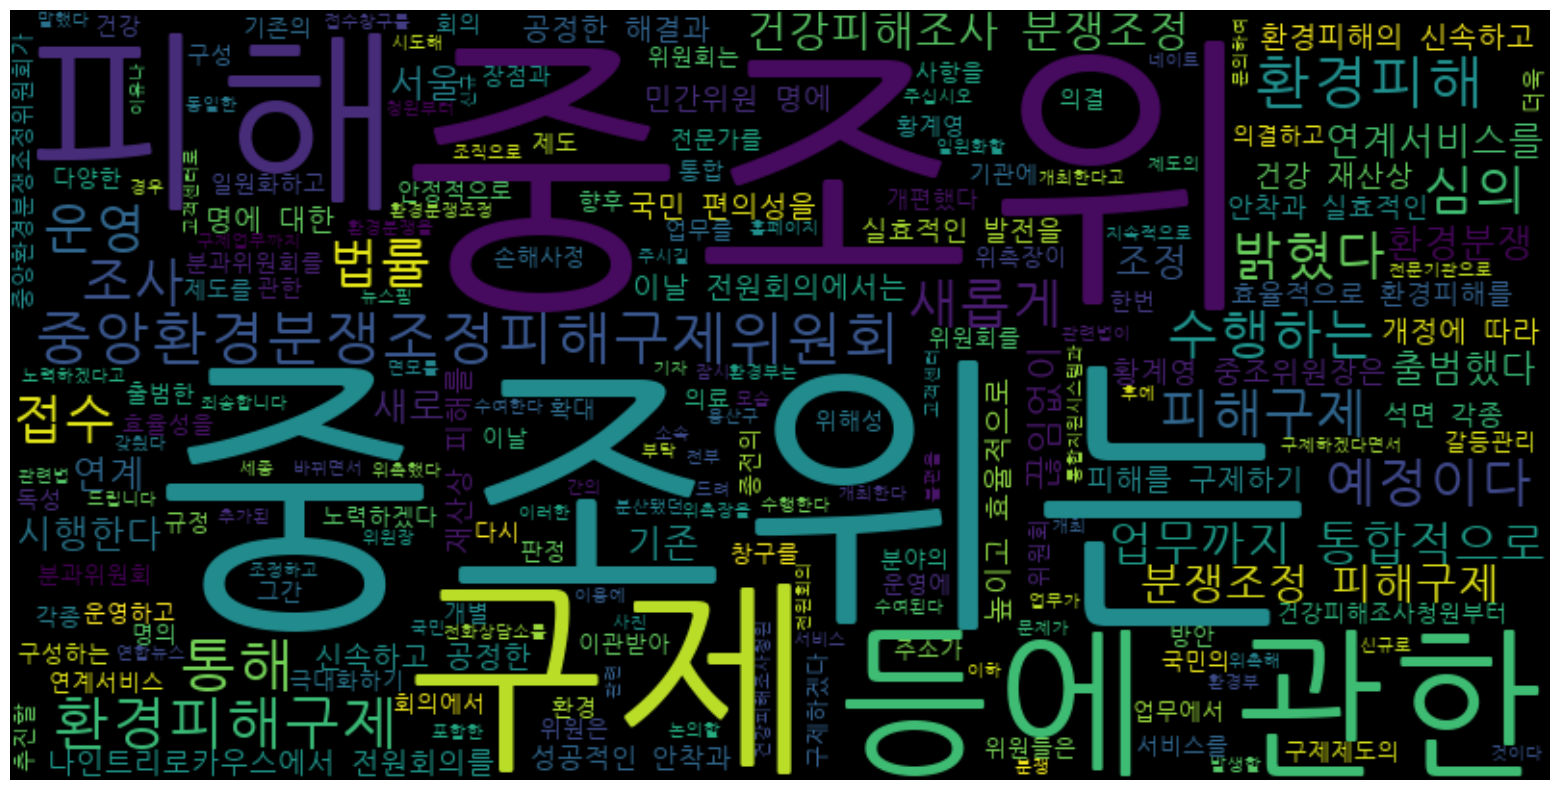

In [12]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(font_path = path, width=800, height=400, min_word_length=2,
            stopwords=['위해','에서','위한','으로','인한','의해','따른']).generate(proc_const)
#collocations: bool, default=True)
#Whether to include collocations (bigrams) of two words. Ignored if using generate_from_frequencies.
#wordcloud.to_file("audit_wc_length2.png") #생성한 이미지를 파일로 저장

plt.subplots(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [37]:
!pip install konlpy --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 30.4 MB/s eta 0:00:00


In [13]:
import math
import time

start = time.time()
from konlpy.tag import Okt
t = Okt()
tokens_pos = t.pos(const_doc) #품사 태깅
end = time.time()

print('#count of tokens:', len(tokens_pos))
print(tokens_pos[:100])

print(f"{end - start:.5f} sec")


tokens_morp = t.morphs(const_doc) #형태소 단위로 tokenize
print('#count of tokens:', len(tokens_morp))
print(tokens_morp[:100])

#count of tokens: 1273
[('nan', 'Alpha'), (',[', 'Punctuation'), ('세종', 'Noun'), ('=', 'Punctuation'), ('뉴스', 'Noun'), ('핌', 'Verb'), (']', 'Punctuation'), ('이유나', 'Noun'), ('기자', 'Noun'), ('=', 'Punctuation'), ('건강', 'Noun'), ('피해', 'Noun'), ('조사', 'Noun'), ('청원', 'Noun'), ('부터', 'Josa'), ('피해', 'Noun'), ('구제', 'Noun'), ('업무', 'Noun'), ('까지', 'Josa'), ('통합', 'Noun'), ('적', 'Suffix'), ('으로', 'Josa'), ('수행', 'Noun'), ('하는', 'Verb'), ("'", 'Punctuation'), ('중앙', 'Noun'), ('환경', 'Noun'), ('분쟁', 'Noun'), ('조정', 'Noun'), ('피해', 'Noun'), ('구', 'Modifier'), ('제', 'Modifier'), ('위원회', 'Noun'), ('(', 'Punctuation'), ('중조', 'Noun'), ('위', 'Noun'), (")'", 'Punctuation'), ('가', 'Verb'), ('새롭게', 'Adjective'), ('출범', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('환경부', 'Noun'), ('소속', 'Noun'), ('중조', 'Noun'), ('위', 'Noun'), ('는', 'Josa'), ('21일', 'Number'), ('서울', 'Noun'), ('나인', 'Noun'), ('트리', 'Noun'), ('로', 'Josa'), ('카', 'Noun'), ('우스', 'Noun'), ('에서', 'Josa'), ('제', 'Noun'), ('1', 'Number'), 

[('에서', 7), ('전', 7), ('제도', 7), ('하고', 7), ('성', 7), ('은', 7), ('통합', 8), ('가', 8), ('원', 8), ('계', 8), ('서비스', 8), ('운영', 8), ('중앙', 9), ('했다', 9), ('과', 9), ('연', 9), ('업무', 10), ('구', 10), ('관', 10), ('위해', 10), ('-', 10), ('위원', 10), ('\n\n', 10), ('조사', 11), ('1', 11), ('회의', 11), ('이', 11), ('으로', 12), ('한', 12), ('·', 12), ('건강', 13), ('는', 14), ('적', 16), ("'", 16), ('위', 16), ('등', 16), ('의', 16), ('을', 17), ('조정', 18), ('분쟁', 19), ('위원회', 19), ('중조', 19), ('에', 19), (',', 19), ('제', 21), ('구제', 27), ('.', 32), ('를', 34), ('환경', 35), ('피해', 49)]


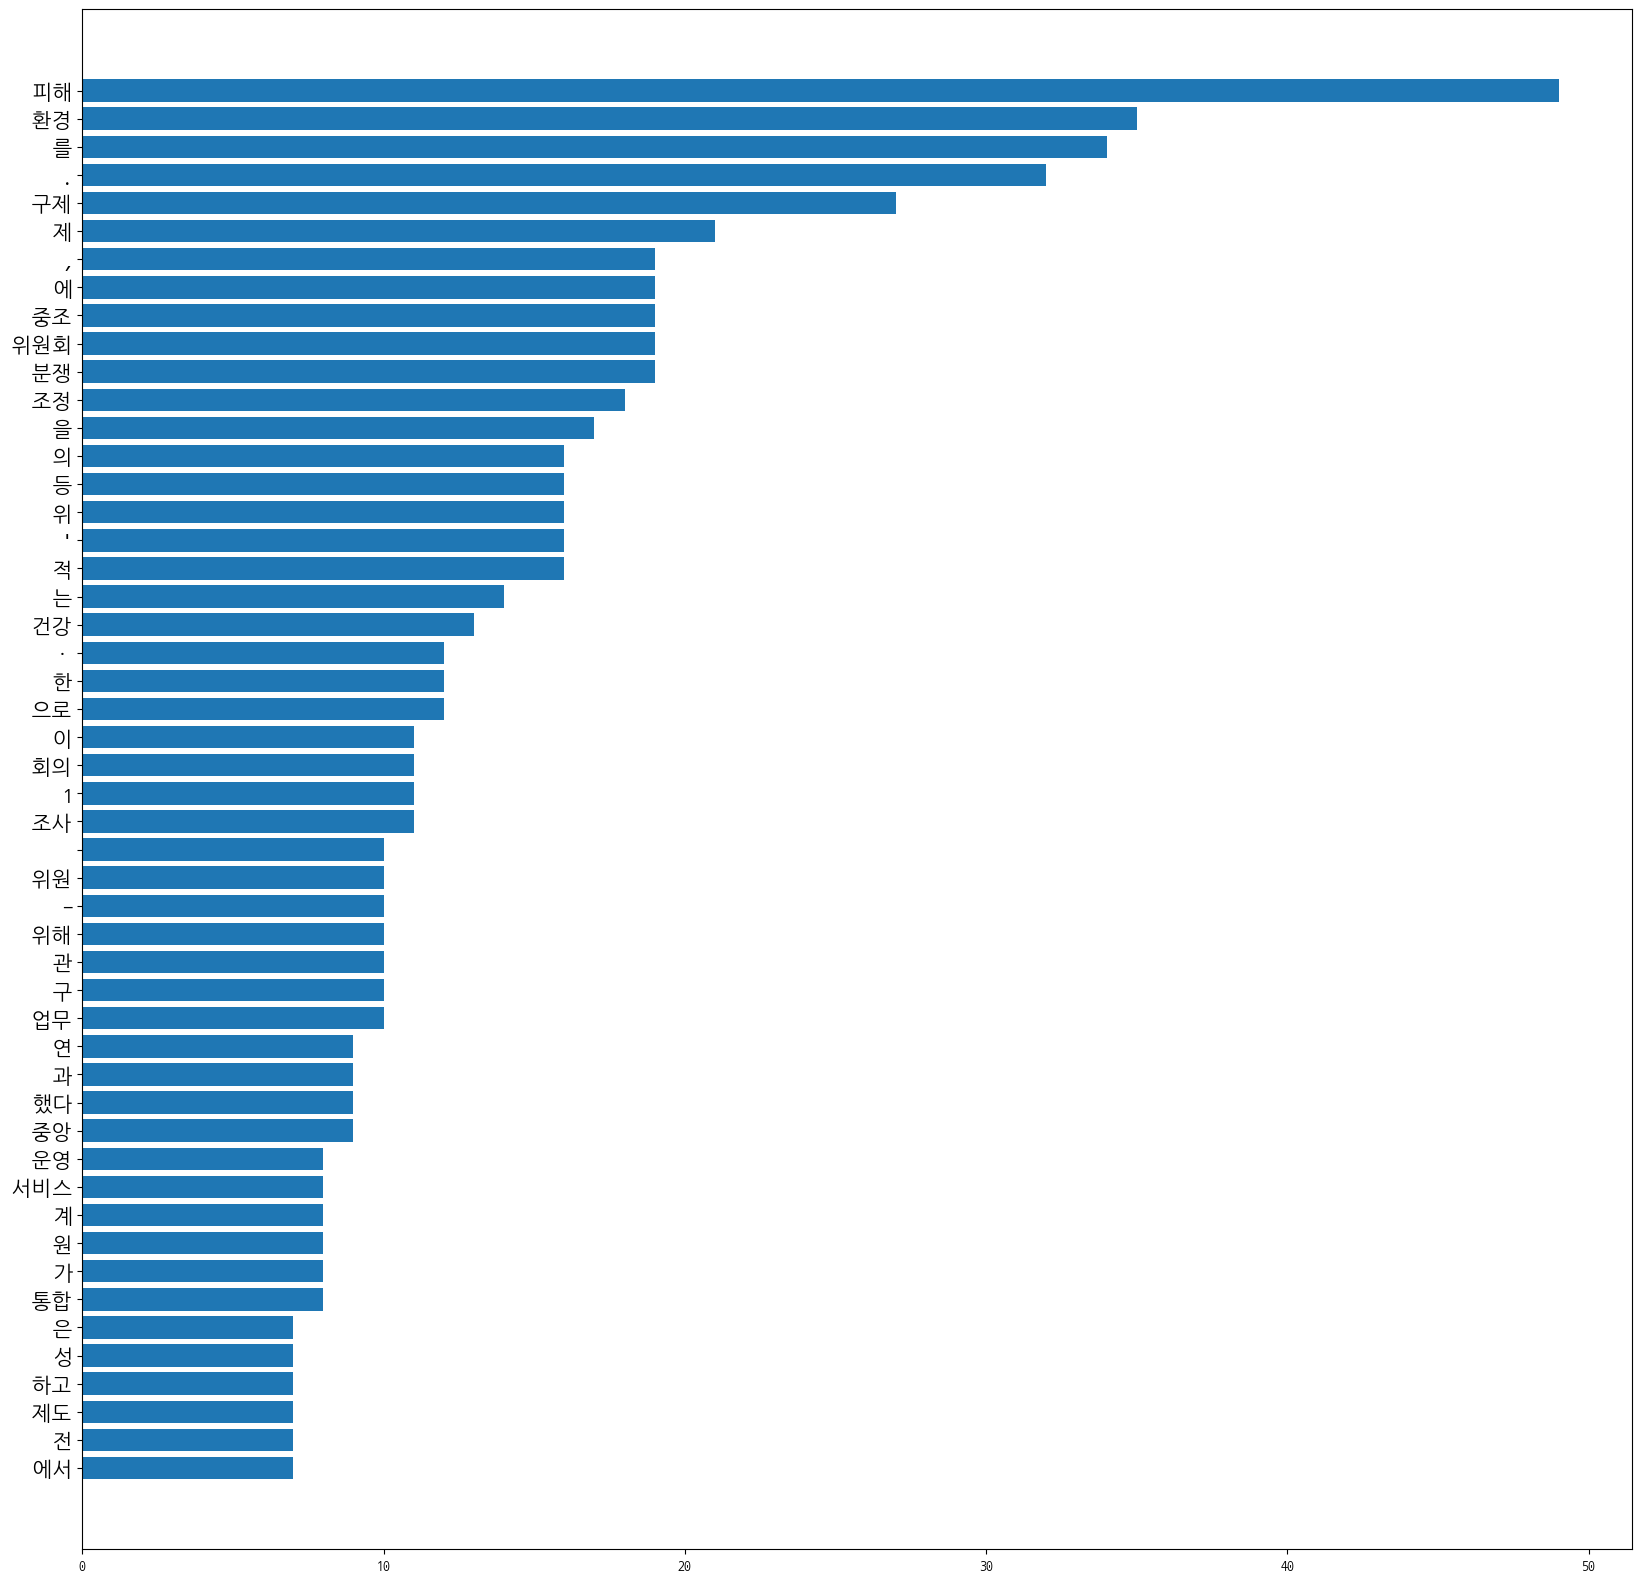

In [14]:
morp_cnt = {}
for word in tokens_morp:
    morp_cnt[word] = morp_cnt.get(word, 0) + 1
sorted_morp = sorted(morp_cnt.items(), key=lambda kv: kv[1])

def word_graph(sorted_w, max_words=10):

    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.subplots(figsize=(20,20))
    plt.yticks(fontsize = 15)
    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(sorted_morp, max_words=50)

#count of tokens: 699
['세종', '뉴스', '이유나', '기자', '건강', '피해', '조사', '청원', '피해', '구제', '업무', '통합', '수행', '중앙', '환경', '분쟁', '조정', '피해', '위원회', '중조', '위', '출범', '환경부', '소속', '중조', '위', '서울', '나인', '트리', '카', '우스', '제', '차', '회의', '개최', '출범', '중조', '위', '환경', '분쟁', '조정', '및', '환경', '피해', '구제', '등', '관', '법률', '전부', '개정', '종전', '중조', '위', '업무', '건강', '피해', '조사', '청원', '피해', '구제', '업무', '통합', '수행', '관련', '법', '기존', '환경', '분쟁', '조정', '업무', '피해', '구제', '업무', '추가', '것', '중조', '위', '환경', '피해', '해결', '국민', '건강', '및', '재산', '피해', '구제', '위해', '그간', '개별', '법률', '기관', '분산', '각종', '제도', '관', '환경', '피해', '구제', '접수', '창구']
[('를', 3), ('청원', 4), ('개최', 4), ('법률', 4), ('관련', 4), ('예정', 4), ('분과', 4), ('심의', 4), ('의결', 4), ('수행', 5), ('기존', 5), ('각종', 5), ('접수', 5), ('효율', 5), ('구성', 5), ('날', 5), ('기', 5), ('명', 5), ('황', 5), ('계영', 5), ('위원장', 5), ('통해', 5), ('출범', 6), ('차', 6), ('및', 6), ('국민', 6), ('위촉', 6), ('제도', 7), ('통합', 8), ('계', 8), ('서비스', 8), ('운영', 8), ('중앙', 9), ('업무', 10), ('관', 10), ('위해', 1

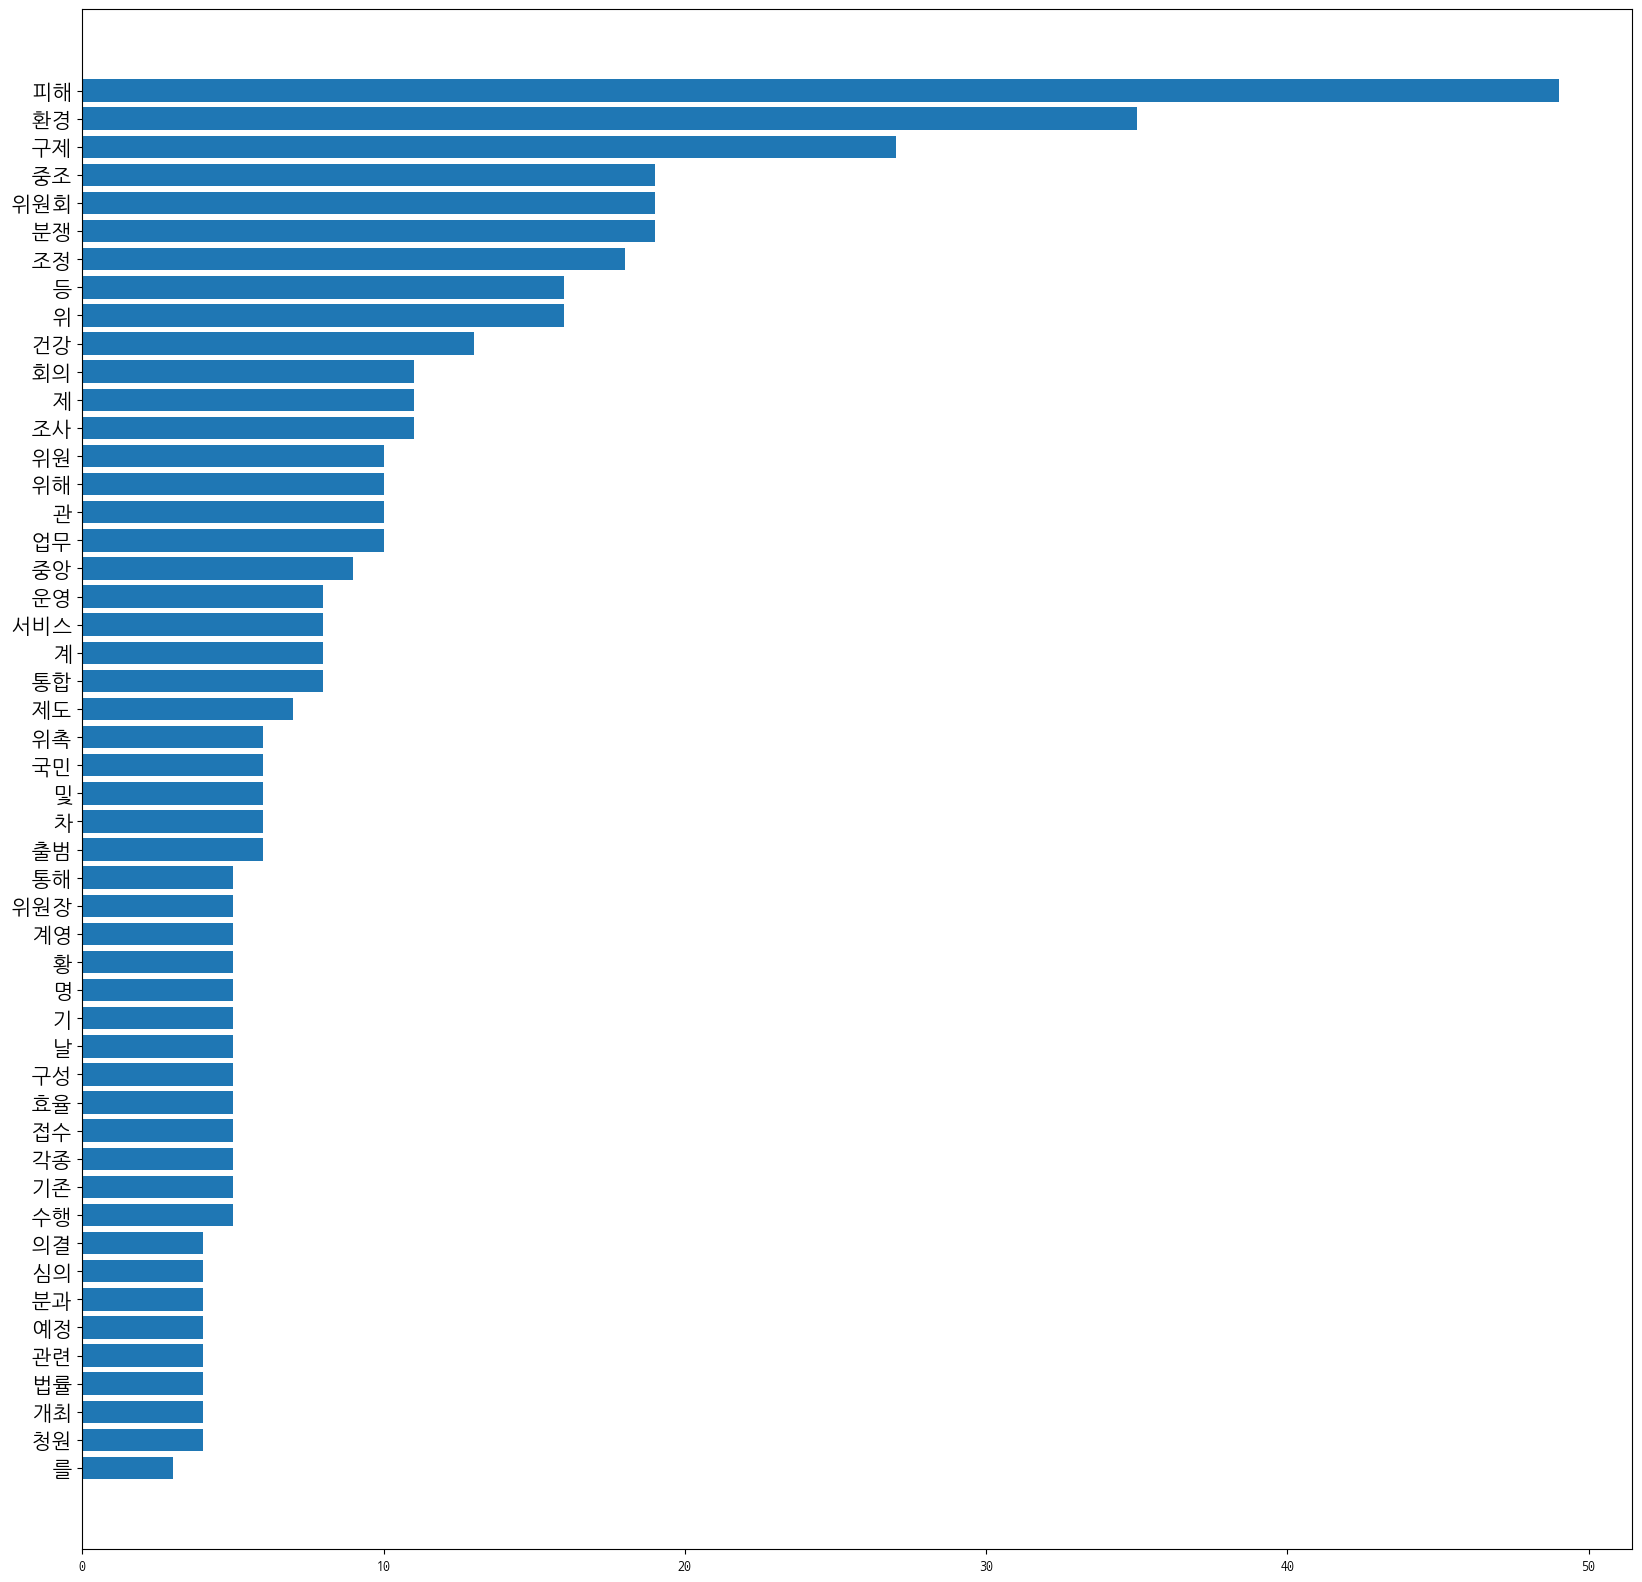

In [15]:
tokens_noun = t.nouns(const_doc) #형태소 단위로 tokenize 후 명사만 추출
print('#count of tokens:', len(tokens_noun))
print(tokens_noun[:100])


noun_cnt = {}
for word in tokens_noun:
    noun_cnt[word] = noun_cnt.get(word, 0) + 1
sorted_noun = sorted(noun_cnt.items(), key=lambda kv: kv[1])

def word_graph(sorted_w, max_words=10):

    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.subplots(figsize=(20,20))
    plt.yticks(fontsize = 15)
    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(sorted_noun, max_words=50)

#count of tokens: 581
['세종', '뉴스', '이유나', '기자', '건강', '피해', '조사', '청원', '피해', '구제', '업무', '통합', '수행', '중앙', '환경', '분쟁', '조정', '피해', '위원회', '중조', '출범', '환경부', '소속', '중조', '서울', '나인', '트리', '우스', '회의', '개최', '출범', '중조', '환경', '분쟁', '조정', '환경', '피해', '구제', '법률', '전부', '개정', '종전', '중조', '업무', '건강', '피해', '조사', '청원', '피해', '구제', '업무', '통합', '수행', '관련', '기존', '환경', '분쟁', '조정', '업무', '피해', '구제', '업무', '추가', '중조', '환경', '피해', '해결', '국민', '건강', '재산', '피해', '구제', '위해', '그간', '개별', '법률', '기관', '분산', '각종', '제도', '환경', '피해', '구제', '접수', '창구', '일원', '예정', '건강', '피해', '조사', '분쟁', '조정', '피해', '구제', '서비스', '시행', '서비스', '안정', '운영', '제도']
[('시행', 3), ('민간', 3), ('대한', 3), ('수여', 3), ('편의', 3), ('높이', 3), ('석면', 3), ('성공', 3), ('안착', 3), ('실효', 3), ('발전', 3), ('노력', 3), ('청원', 4), ('개최', 4), ('법률', 4), ('관련', 4), ('예정', 4), ('분과', 4), ('심의', 4), ('의결', 4), ('수행', 5), ('기존', 5), ('각종', 5), ('접수', 5), ('효율', 5), ('구성', 5), ('계영', 5), ('위원장', 5), ('통해', 5), ('출범', 6), ('국민', 6), ('위촉', 6), ('제도', 7), ('통합', 

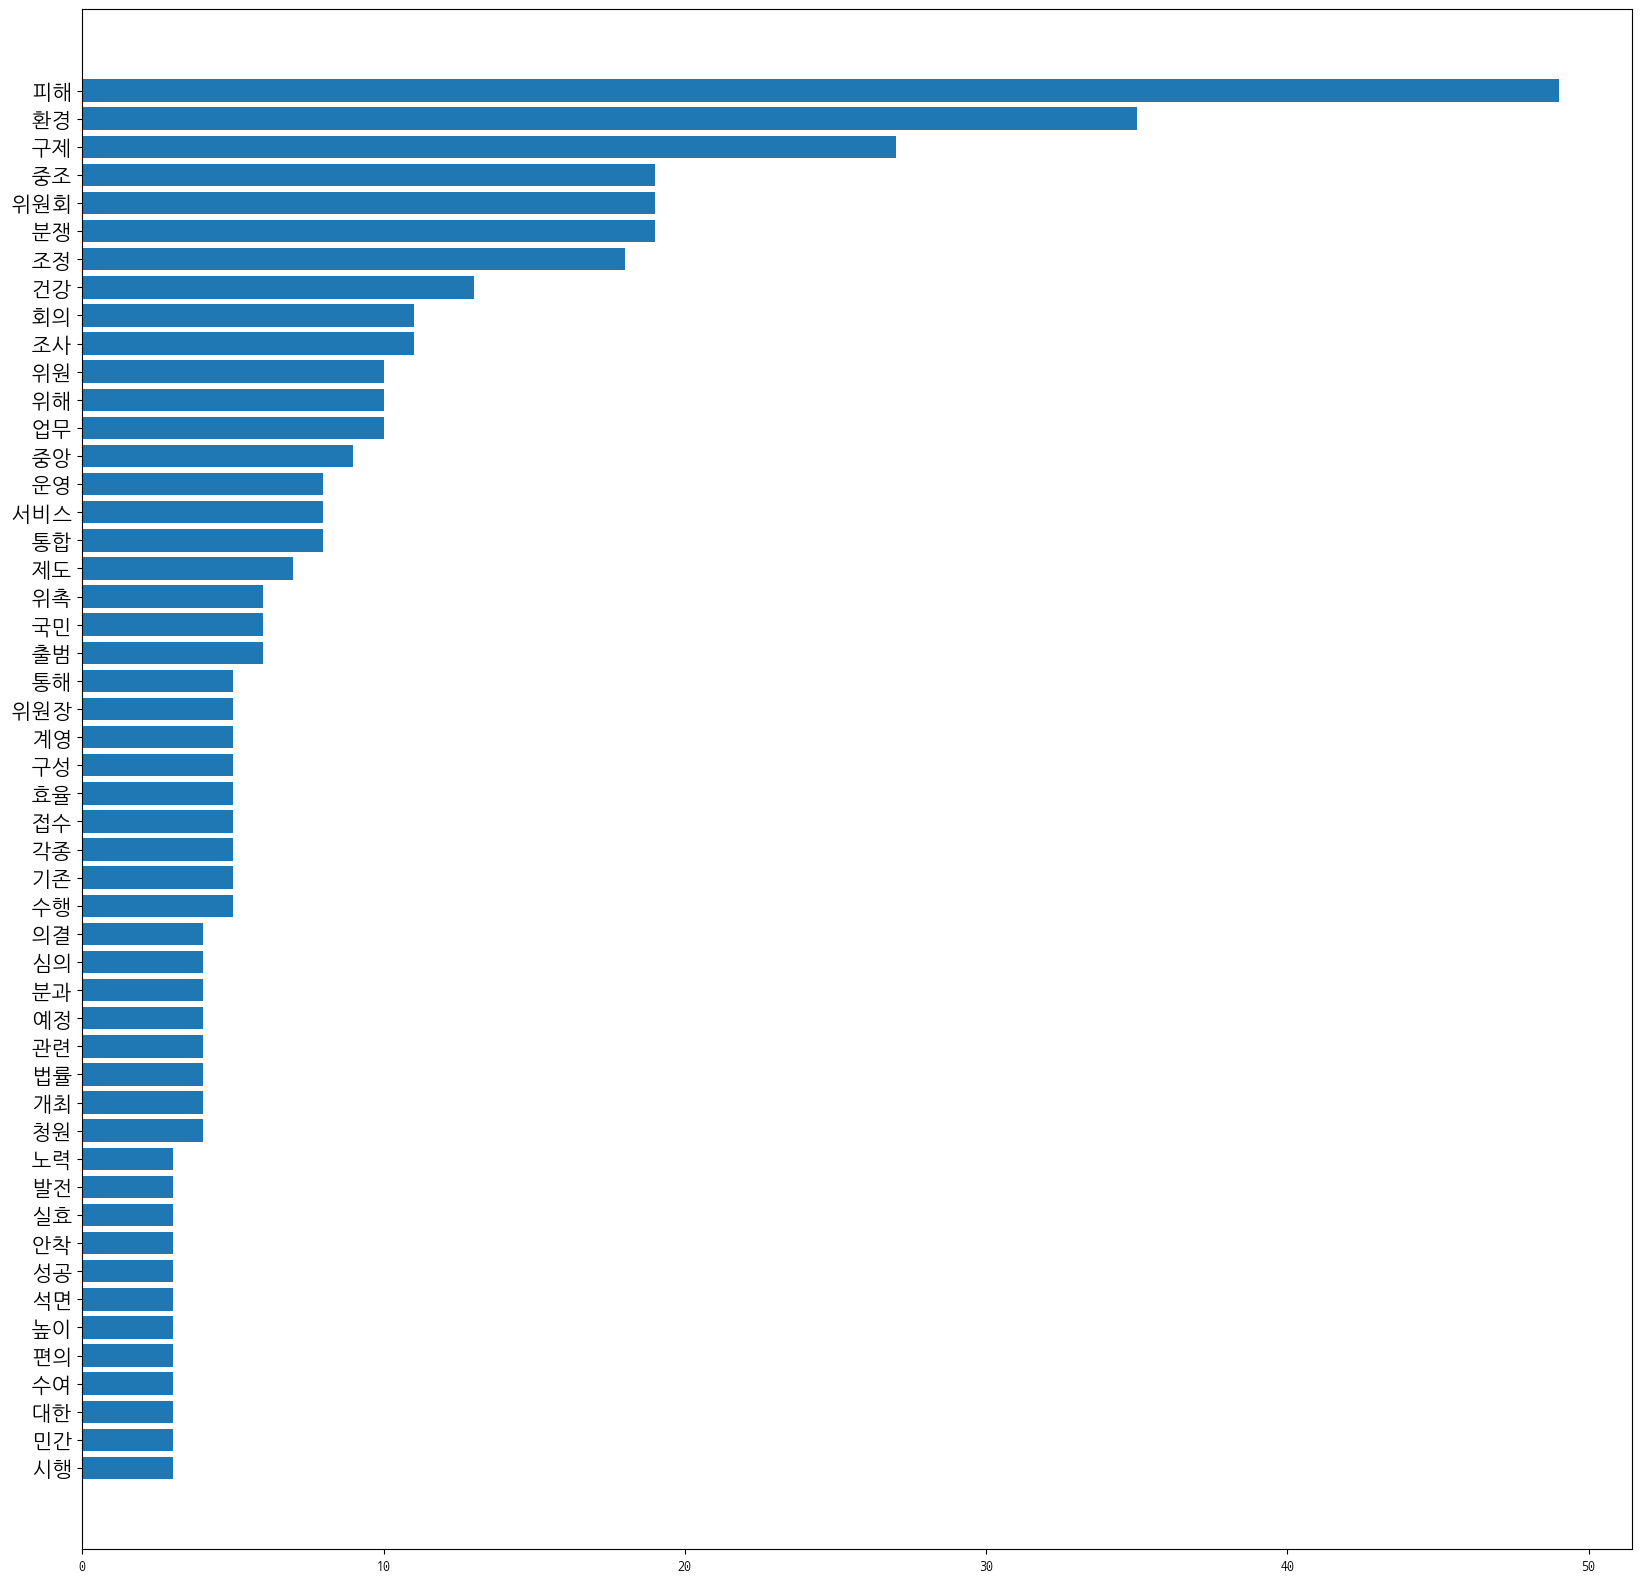

In [16]:
tokens_twos = [token for token in tokens_noun if len(token) > 1]
print('#count of tokens:', len(tokens_twos))
print(tokens_twos[:100])

twos_cnt = {}
for word in tokens_twos:
    twos_cnt[word] = twos_cnt.get(word, 0) + 1
sorted_twos = sorted(twos_cnt.items(), key=lambda kv: kv[1])

def word_graph(sorted_w, max_words=10):

    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.subplots(figsize=(20,20))
    plt.yticks(fontsize = 15)
    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('article_bar_length2.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(sorted_twos, max_words=50)

#result of my_tokenizer: ['세종', '뉴스', '이유나', '기자'] [('nan', 'Alpha'), (',[', 'Punctuation'), ('세종', 'Noun'), ('=', 'Punctuation'), ('뉴스', 'Noun'), ('핌', 'Verb'), (']', 'Punctuation'), ('이유나', 'Noun'), ('기자', 'Noun'), ('=', 'Punctuation')]


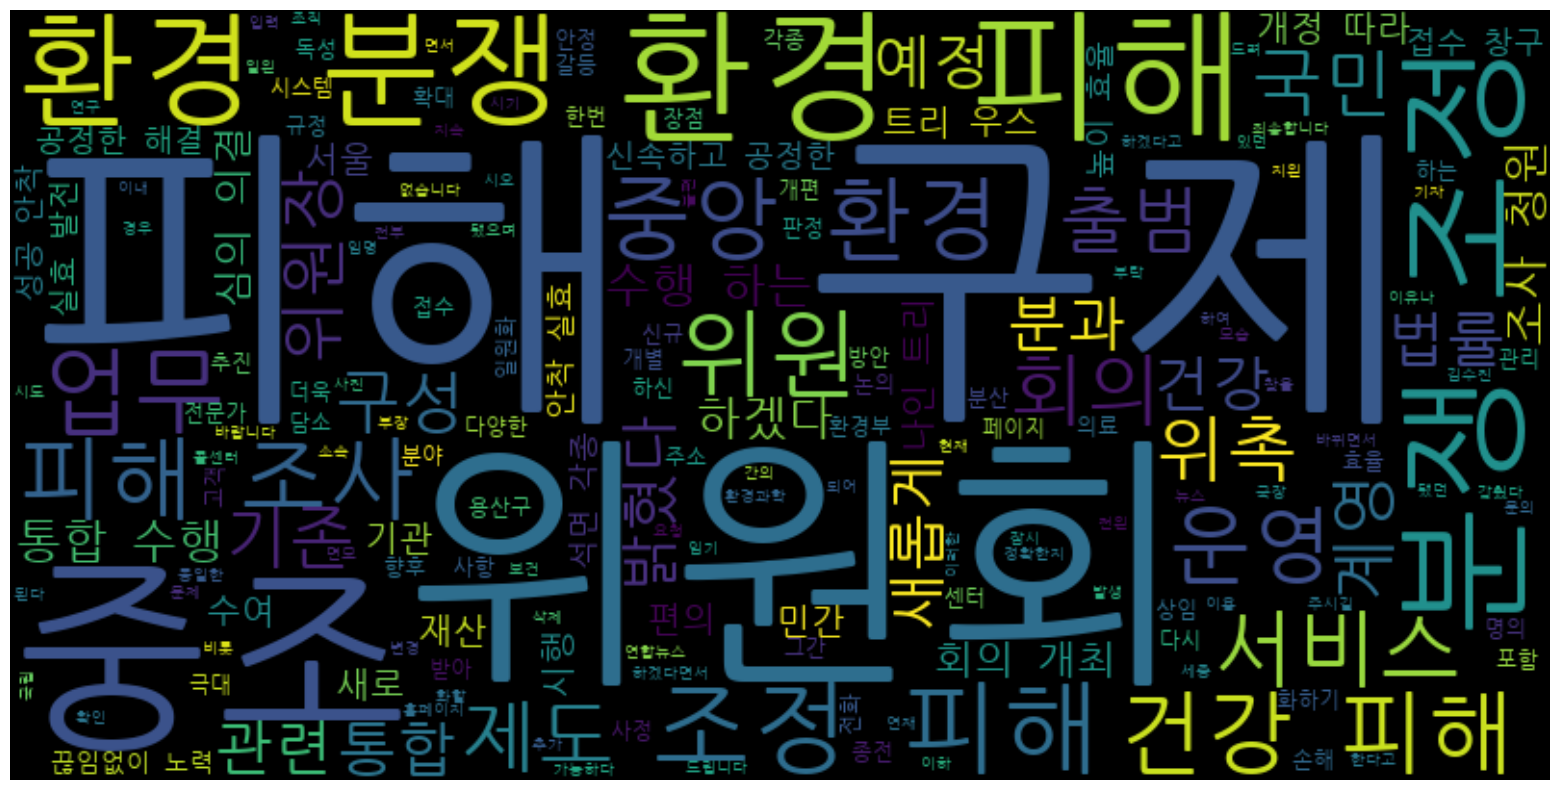

In [18]:
def my_tokenizer(doc):
    #my_pos = [token for token, pos in doc if pos in ['Noun', 'Verb', 'Adjective']]
    return [token for token, pos in doc if pos in ['Noun', 'Verb', 'Adjective'] and len(token)>1]

print("#result of my_tokenizer:", my_tokenizer(tokens_pos[:10]), tokens_pos[:10])
tokens_mines = my_tokenizer(tokens_pos)


tokens_str = ' '.join(tokens_mines)
wordcloud = WordCloud(font_path = path, width=800, height=400, min_word_length=2, max_words=200,
                      stopwords=['했다','있다','했다고','했으며','하며','대한','한다', '됐다', '라며', '있는', '위해', '통해', '하기']).generate(tokens_str)
wordcloud.to_file("article_wc_token_pos.png") #생성한 이미지를 파일로 저장

plt.subplots(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [123]:
!pip install squarify --upgrade --quiet

In [139]:
import json

json.dumps(sorted_twos[-20:]), sorted_twos[-20:]

('[["\\uc911\\uc559", 38], ["\\ub300\\ud45c", 38], ["\\uc870\\uc120", 40], ["\\uc218\\uad50", 41], ["\\uc804\\ub7b5", 42], ["\\uacf5\\ub3d9", 44], ["\\uc778\\ubbfc", 48], ["\\uc8fc\\ub144", 49], ["\\uc62c\\ud574", 51], ["\\uc591\\uad6d", 58], ["\\ud611\\ub825", 60], ["\\ubd81\\uc911", 65], ["\\uc704\\uc6d0\\uc7a5", 67], ["\\uce5c\\uc120", 68], ["\\uc6b0\\ud638", 70], ["\\ubc1c\\uc804", 73], ["\\uc911\\uc870", 104], ["\\uad00\\uacc4", 127], ["\\ubd81\\ud55c", 175], ["\\uc911\\uad6d", 232]]',
 [('중앙', 38),
  ('대표', 38),
  ('조선', 40),
  ('수교', 41),
  ('전략', 42),
  ('공동', 44),
  ('인민', 48),
  ('주년', 49),
  ('올해', 51),
  ('양국', 58),
  ('협력', 60),
  ('북중', 65),
  ('위원장', 67),
  ('친선', 68),
  ('우호', 70),
  ('발전', 73),
  ('중조', 104),
  ('관계', 127),
  ('북한', 175),
  ('중국', 232)])

In [136]:
import squarify

plt.figure(figsize=(12, 10))

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = mpl.colors.Normalize(vmin=min(sorted_twos[-20:].values()),
                            vmax=max(sorted_twos[-20:].values()))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [mpl.cm.Blues(norm(value)) for value in sorted_twos[-20:].values()]

# squarify 플랏생성(label 단어, 박스 크기는 빈도, 색깔르 cm.Blue, 투명도는 30%
squarify.plot(label=sorted_twos[-20:].keys(),
              sizes=sorted_twos[-20:].values(),
              color=colors,
              alpha=.7)

AttributeError: 'list' object has no attribute 'values'

<Figure size 1200x1000 with 0 Axes>

[('높이', 3), ('석면', 3), ('성공', 3), ('안착', 3), ('실효', 3), ('발전', 3), ('끊임없이', 3), ('노력', 3), ('새로', 3), ('청원', 4), ('새롭게', 4), ('개최', 4), ('밝혔다', 4), ('법률', 4), ('관련', 4), ('예정', 4), ('분과', 4), ('심의', 4), ('의결', 4), ('하겠다', 4), ('수행', 5), ('기존', 5), ('각종', 5), ('접수', 5), ('효율', 5), ('구성', 5), ('계영', 5), ('위원장', 5), ('통해', 5), ('출범', 6), ('국민', 6), ('위촉', 6), ('제도', 7), ('통합', 8), ('서비스', 8), ('운영', 8), ('중앙', 9), ('업무', 10), ('위해', 10), ('위원', 10), ('조사', 11), ('회의', 11), ('건강', 13), ('조정', 18), ('분쟁', 19), ('위원회', 19), ('중조', 19), ('구제', 27), ('환경', 35), ('피해', 49)]


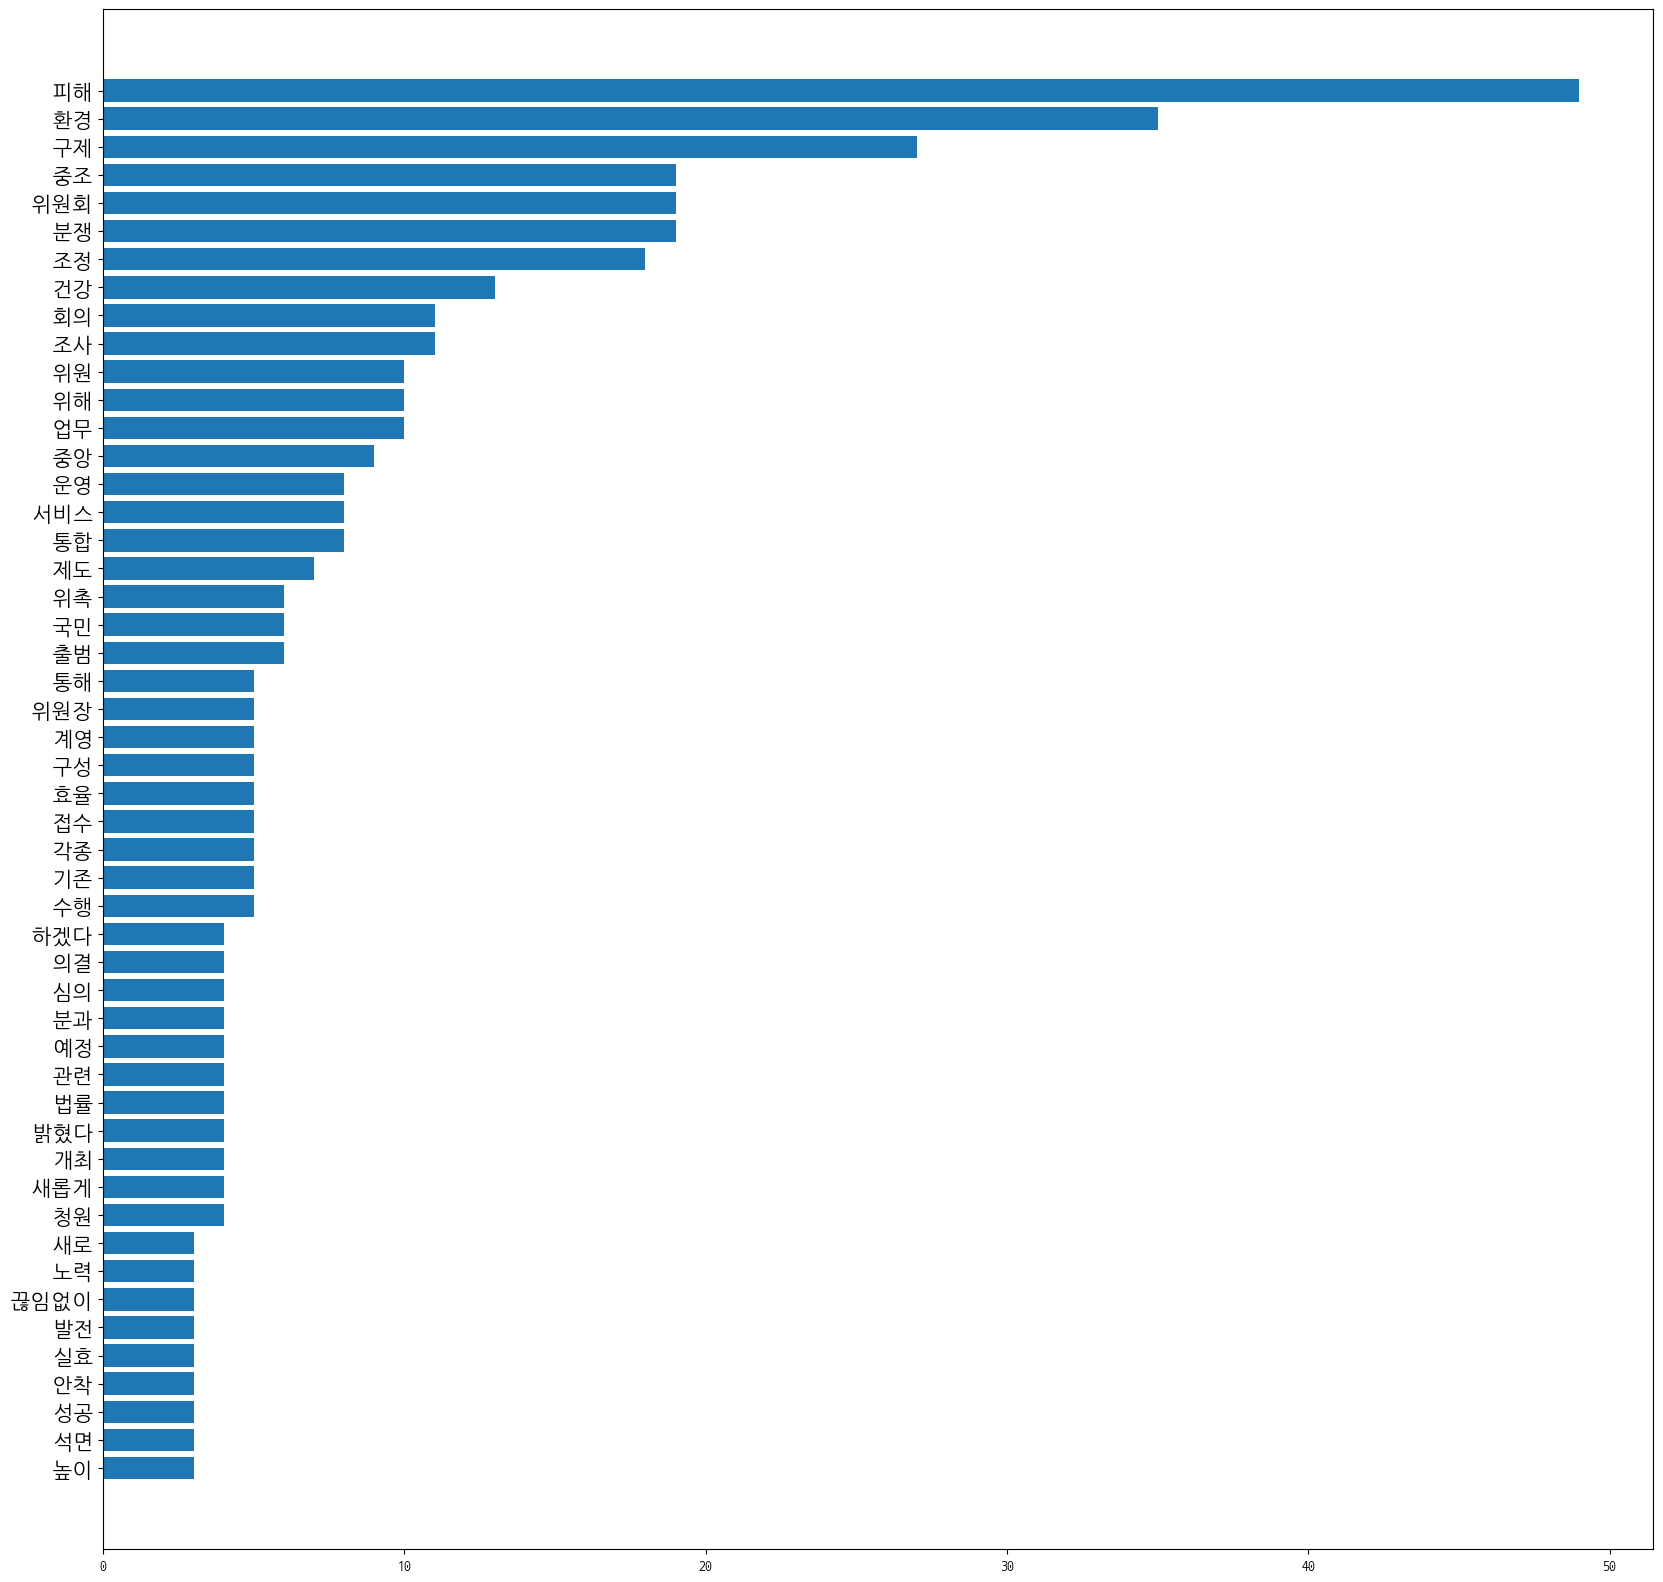

In [20]:
mines_cnt = {}
for word in tokens_mines:
    mines_cnt[word] = mines_cnt.get(word, 0) + 1
mines_cnt.pop('했다'), mines_cnt.pop('있다'), mines_cnt.pop('한다')
mines_cnt.pop('하는'),# mines_cnt.pop('하며')

sorted_mines = sorted(mines_cnt.items(), key=lambda kv: kv[1])

def word_graph(sorted_w, max_words=10):
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.subplots(figsize=(20,20))
    plt.yticks(fontsize = 15)
    plt.barh(range(len(n)),w,tick_label=n)
    plt.savefig('article_bar_token_pos.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(sorted_mines, max_words=50)

In [21]:
def my_vectorizer(doc):
    return [token for token, pos in t.pos(doc) if pos in ['Noun', 'Verb', 'Adjective'] and len(token)>1]
print("#result of my_tokenizer:", my_vectorizer(csv_df['Article'][1]))

#result of my_tokenizer: ['세종', '뉴스', '이유나', '기자', '건강', '피해', '조사', '청원', '피해', '구제', '업무', '통합', '수행', '하는', '중앙', '환경', '분쟁', '조정', '피해', '위원회', '중조', '새롭게', '출범', '했다', '환경부', '소속', '중조', '서울', '나인', '트리', '우스', '회의', '개최', '한다고', '밝혔다', '새롭게', '출범', '중조', '환경', '분쟁', '조정', '환경', '피해', '구제', '법률', '전부', '개정', '따라', '종전', '중조', '업무', '건강', '피해', '조사', '청원', '피해', '구제', '업무', '통합', '수행', '한다', '관련', '바뀌면서', '기존', '환경', '분쟁', '조정', '업무', '피해', '구제', '업무', '추가', '중조', '환경', '피해', '신속하고', '공정한', '해결', '국민', '건강', '재산', '피해', '구제', '하기', '위해', '그간', '개별', '법률', '기관', '분산', '됐던', '각종', '제도', '받아', '환경', '피해', '구제', '접수', '창구', '일원', '화할', '예정', '건강', '피해', '조사', '분쟁', '조정', '피해', '구제', '서비스', '시행', '한다', '이러한', '서비스', '안정', '운영', '제도', '간의', '장점', '효율', '극대', '화하기', '위해', '분과', '위원회', '새롭게', '구성', '하는', '위원회', '확대', '개편', '했다', '의료', '독성', '위해', '손해', '사정', '갈등', '관리', '다양한', '분야', '전문가', '신규', '위촉', '기존', '환경', '분쟁', '포함', '환경', '피해', '구제', '기관', '면모', '갖췄다', '회의', '중조', '민간', '위원', '대한'

In [22]:
from nltk import FreqDist
from nltk.util import ngrams

def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [my_vectorizer(document) for document in corpus]

    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents]

    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    ngram_df = pd.DataFrame(top_freq, columns=["ngram", "count"])
    ngram_df['ngram']=ngram_df['ngram'].astype(str)
    #ngram_df["col"] = str(ngram)
    return ngram_df# Get frequent ngrams for all 4

'''
ngrams_df = DataFrame()
for i in range(1,5):
  ngrams_df = pd.concat([ngrams_df, get_frequent_ngram(csv_df['Article'], i)])
'''

"\nngrams_df = DataFrame()\nfor i in range(1,5):\n  ngrams_df = pd.concat([ngrams_df, get_frequent_ngram(csv_df['Article'], i)])\n"

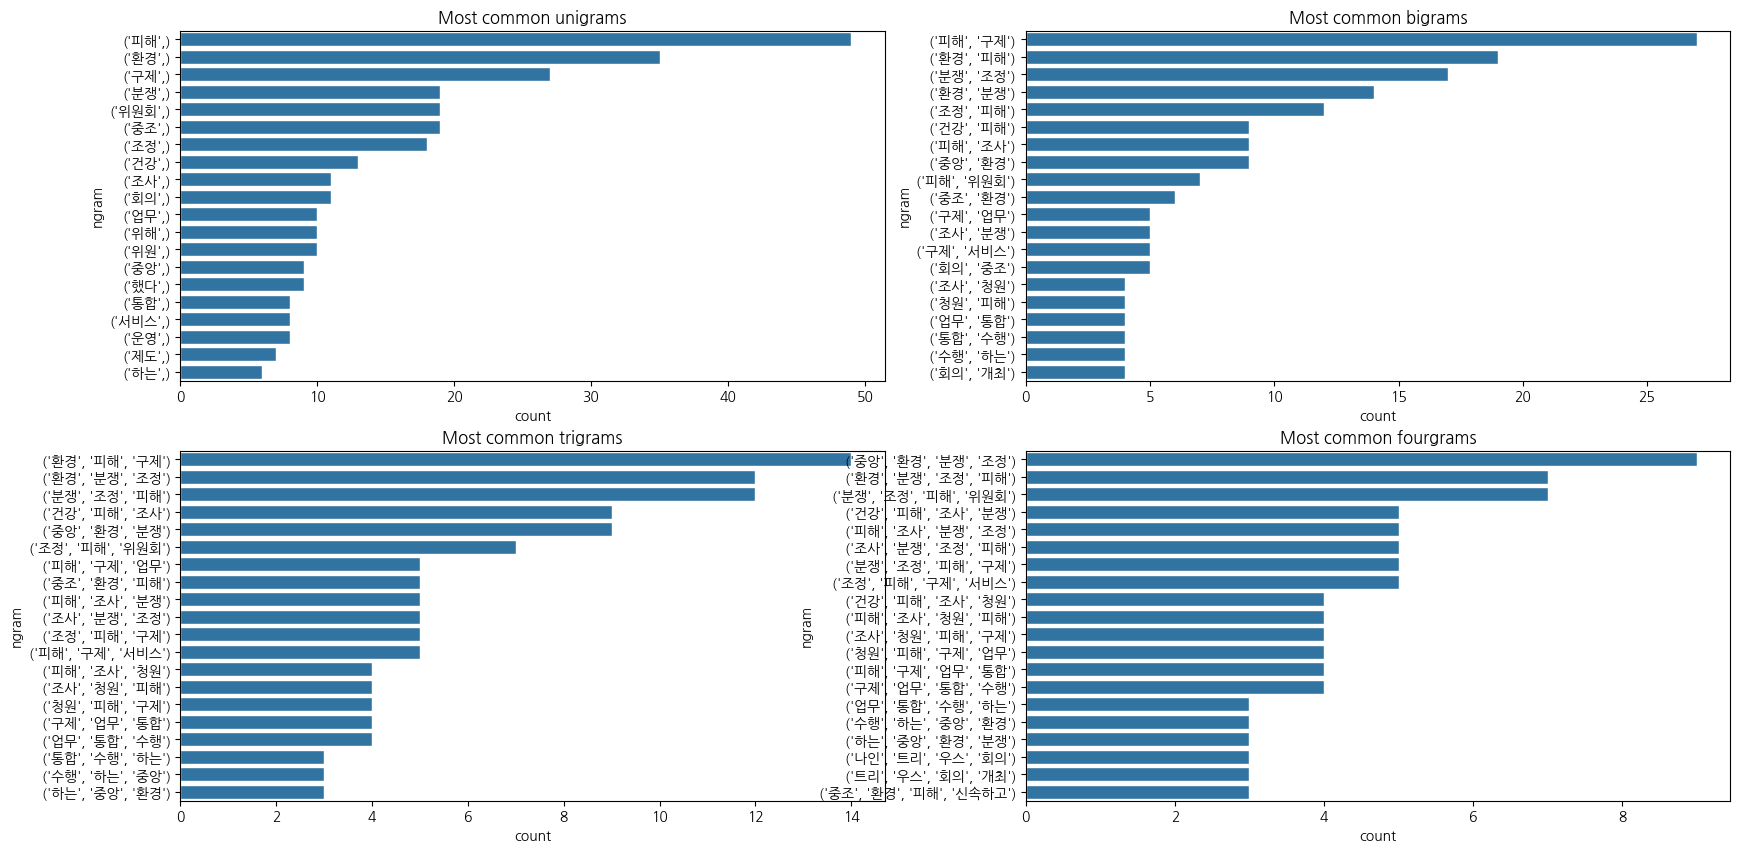

In [23]:
plt.rcParams['font.family'] = 'NanumGothic'

fig, ax = plt.subplots(2,2, figsize=(20, 10))
mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
#sns.set_color_codes('pastel')
#sns.set_color_codes('muted')

for i in range(1,5):
    b = str(format(i-1,'b'))
    if len(b)<2:
        b='0'+b
    ndf = get_frequent_ngram(csv_df['Article'], i)
    sns.set_theme(style="whitegrid") ## figure, axes 스타일
    sns.barplot(x=ndf['count'], y=ndf['ngram'], ax=ax[int(b[0]), int(b[1])]).set(title=f"Most common {mapping[i]}grams")
    #sns.barplot(palette='Blues_r', edgecolor='w', x="count", y="ngram", data=get_frequent_ngram(csv_df['Article'], i), ax=ax[int(b[0]), int(b[1])]).set(title=f"Most common {mapping[i]}grams")
    plt.title(f"Most common {mapping[i]}grams")
plt.savefig('article_ngram_token_pos.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
plt.show()


In [47]:
import pandas as pd

csv_files = [
    '/content/articles_중조(2024).csv',
    '/content/articles_중조(2025).csv',
    '/content/articles_중조+탈황.csv'
]

dfs = []
for i, file in enumerate(csv_files):
    df = pd.read_csv(file)
    df['Category'] = str(i)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True, axis=0)
merged_df.shape, merged_df.columns, merged_df.head()

((59, 8),
 Index(['Unnamed: 0', 'Date', 'Media', 'Title', 'Article', 'Summary',
        'Category', 'Unnamed: 0.1'],
       dtype='object'),
    Unnamed: 0          Date       Media  \
 0           0  2024. 7. 10.        통일뉴스   
 1           1  2024. 6. 19.  뉴스더보이스헬스케어   
 2           2  2024. 2. 14.        데일리팜   
 3           3  2024. 4. 12.      네이트 뉴스   
 4           4  2024. 2. 14.        의약뉴스   
 
                                                Title  \
 0                  중 외교부, “‘중조관계 어떻다’는 한국 매체 보도는 소설”   
 1                  "다른 제조번호도 추가 회수"...씨엠지 등 중조단 후속조치   
 2                    [데일리팜] 바이넥스 점안액 균 검출 논란 수사 착수하나   
 3  中 자오러지, '북중우호의 해' 개막식 참석…"중조친선, 새로운 장 써나가자" : ...   
 4                    식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”   
 
                                              Article  \
 0  9일 브리핑하는 린젠 중국 외교부 대변인. [사진 갈무리-중 외교부]\n\n“최근 ...   
 1  지난해 6월 '허가사항과 다르게 제조'로 회수조치...테라젠이텍스도 대상 포함\n\...   
 2                                                NaN   
 3  \n\n[평양=AP/뉴시스] 중

In [54]:
merged_df.iloc[:,1:-1].to_csv('articles_all_ko.csv')

In [139]:
csv_df = merged_df.iloc[:,1:-1]
csv_df.shape

(59, 6)

In [141]:
idx = csv_df[csv_df['Article'].isna()].index
csv_df.drop(idx , inplace=True)
csv_df.shape

(46, 6)

In [145]:
csv_df.drop([4] , inplace=True)
csv_df.shape

(45, 6)

In [146]:
csv_df.reset_index(drop=True, inplace=True)

In [147]:
csv_df.head()

,Date,Media,Title,Article,Summary,Category
0,2024. 7. 10.,통일뉴스,"중 외교부, “‘중조관계 어떻다’는 한국 매체 보도는 소설”",9일 브리핑하는 린젠 중국 외교부 대변인. [사진 갈무리-중 외교부]\n\n“최근 ...,9일 브리핑하는 린젠 중국 외교부 대변인.\n“나는 관련 매체가 전문적 수준을 가지...,0
1,2024. 6. 19.,뉴스더보이스헬스케어,"""다른 제조번호도 추가 회수""...씨엠지 등 중조단 후속조치",지난해 6월 '허가사항과 다르게 제조'로 회수조치...테라젠이텍스도 대상 포함\n\...,지난해 '허가(신고)사항과 다르게 제조한 의약품'이 적발되면서 회수조치된 씨엠지제약...,0
2,2024. 4. 12.,네이트 뉴스,"中 자오러지, '북중우호의 해' 개막식 참석…""중조친선, 새로운 장 써나가자"" : ...",\n\n[평양=AP/뉴시스] 중국 서열 3위인 자오러지 전국인민대표대회(전인대) 상...,[평양=AP/뉴시스] 중국 서열 3위인 자오러지 전국인민대표대회(전인대) 상무위원장...,0
3,2024. 2. 14.,의약뉴스,"식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”",징역 3년 이상 피의자 대상...관련 기준 마련\n\n[의약뉴스] 식품의약품안전처가...,징역 3년 이상 피의자 대상...관련 기준 마련[의약뉴스] 식품의약품안전처가 불법 ...,0
4,2024. 9. 9.,한겨레,북 노동신문은 왜 ‘푸틴 축전’을 ‘시진핑’보다 먼저 소개했나,본문\n\n기사를 읽어드립니다 Your browser does not support...,0김정은 조서노동당 총비서 겸 국무위원장과 시진핑 중국공산당 중앙위 총서기 겸 국가...,0


In [148]:
csv_df.tail()

,Date,Media,Title,Article,Summary,Category
40,5개월 전,매일경제,"현대건설, 철강 부산물로 만든 `친환경 건설재료` 녹색기술 인증 획득",환경 보호·부가가치 창출·비용 절감 `일석삼조` 효과\n\n사진 확대 현장에서 연약...,환경 보호·부가가치 창출·비용 절감 `일석삼조` 효과사진 확대 현장에서 연약지반 개...,2
41,5개월 전,조세금융신문,요청하신 페이지를 찾을 수 없습니다.,"? 요청하신 페이지를 찾을 수 없습니다.\n\n주소가 잘못 입력되었거나, 변경 혹은...","요청하신 페이지를 찾을 수 없습니다.\n주소가 잘못 입력되었거나, 변경 혹은 삭제되...",2
42,5개월 전,NSP통신,www.nspna.com : 404 File Not Found,죄송합니다. 요청하신 페이지를 찾을 수 없습니다.\n\n404 File Not Fo...,요청하신 페이지를 찾을 수 없습니다.\n404 File Not FoundResour...,2
43,5개월 전,머니S,"현대건설, 철강 부산물로 친환경 건설재료 개발… 녹색기술 인증",현대건설이 철강 부산물을 활용한 친환경 건설재료를 개발했다. 사진은 친환경 고화재 ...,현대건설이 철강 부산물을 활용한 친환경 건설재료를 개발했다.\n사진은 친환경 고화재...,2
44,5개월 전,뉴데일리 경제,"현대건설, 연약지반용 고화재 개발…7번째 녹색기술 인증",▲ 건설현장 연약지반 개량을 위해 고화재를 주입중인 모습. ⓒ 현대건설\n\n현대건...,▲ 건설현장 연약지반 개량을 위해 고화재를 주입중인 모습.\n이번에 인증 받은 연약...,2


In [154]:
i=44
csv_df['Article'][i]#, df.Article.iloc[i]

'▲ 건설현장 연약지반 개량을 위해 고화재를 주입중인 모습. ⓒ 현대건설\n\n현대건설이 철강부산물을 이용한 연약지반 처리용 지반고화재 제조기술로 지난 7월 녹색기술 인증에 성공했다. 녹색기술 인증은 에너지와 자원을 절약해 온실가스와 오염물질 배출을 최소화한 기술을 인증하는 제도다.\n\n이로써 현대건설은 생활용수절감·환기제어 등에 이어 7번째 녹색기술 인증을 받게 됐다.\n\n이번에 인증 받은 연약지반 처리기술은 산업부산물 재활용해 부가가치 창출은 물론 비용절감과 기술경쟁력 확보 효과를 거둘 수 있다는 점에서 의미가 크다.\n\n건설현장 경우 구조물을 세우기 전 연약지반을 단단하게 만들기 위해 고화재를 투입해야 할 때가 있다. 일반적으로 시멘트와 같은 고화재는 바닷물과 접촉했을 때 주변환경에 영향을 줄 우려가 있고, 제조과정에서 이산화탄소(CO₂)가 발생해 친환경 고화재 개발이 시급했다.\n\n이에 현대건설은 현대제철·CMD기술단·대웅과 함께 철강제조시 발생하는 중조탈황분진을 원료로 친환경 건설재료를 공동으로 개발, 실용화에 성공했다.\n\n현대건설은 해당 부산물로 만든 고화재를 인천신항 배후단지현장에 시험적용한 결과 우수성을 검증, 친환경 건설재료 및 연약지반 개량공사 분야 기술경쟁력을 획득했다. 특히 현대제철은 산업부산물 처리비용 절감효과를 얻어 그룹 시너지효과를, CMD기술단과 대웅은 기술경쟁력 동반 강화 기회를 얻게 됐다.\n\n현대건설 관계자는 "향후 해당기술을 여러 건설분야에 확대 적용해 나갈 것"이라며 "앞으로도 지속적인 연구를 통해 차세대 친환경 건설재료 개발 및 기술역량 강화에 앞장서겠다"고 말했다.\n\n'

In [155]:
start = len(csv_df['Article'][i]) // 2 #첫째 리뷰의 문자수를 확인하고 뒤 절반을 가져오기 위해 중심점을 찾음
source = csv_df['Article'][i][-start:] #중심점으로부터 뒤 절반을 가져와서 비교할 문서를 생성
start, source

(396,
 ', 제조과정에서 이산화탄소(CO₂)가 발생해 친환경 고화재 개발이 시급했다.\n\n이에 현대건설은 현대제철·CMD기술단·대웅과 함께 철강제조시 발생하는 중조탈황분진을 원료로 친환경 건설재료를 공동으로 개발, 실용화에 성공했다.\n\n현대건설은 해당 부산물로 만든 고화재를 인천신항 배후단지현장에 시험적용한 결과 우수성을 검증, 친환경 건설재료 및 연약지반 개량공사 분야 기술경쟁력을 획득했다. 특히 현대제철은 산업부산물 처리비용 절감효과를 얻어 그룹 시너지효과를, CMD기술단과 대웅은 기술경쟁력 동반 강화 기회를 얻게 됐다.\n\n현대건설 관계자는 "향후 해당기술을 여러 건설분야에 확대 적용해 나갈 것"이라며 "앞으로도 지속적인 연구를 통해 차세대 친환경 건설재료 개발 및 기술역량 강화에 앞장서겠다"고 말했다.\n\n')

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
article_cv = CountVectorizer(ngram_range=(1, 3), max_features=1000, tokenizer=my_vectorizer)
article_dtm = article_cv.fit_transform(csv_df['Article'])
article_dtm.shape

for word, count in zip(article_cv.get_feature_names_out(), article_dtm[1].toarray()[0]):
    if count > 0:
        print(word, ':', count, end=', ')

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


같은 : 1, 결과 : 1, 과정 : 1, 관계자 : 1, 관련 : 1, 금지 : 1, 기관지 : 2, 뉴스 : 1, 대상 : 3, 됐다 : 3, 되는 : 1, 따라 : 1, 따르면 : 1, 무단 : 1, 무단 배포 : 1, 무단 배포 금지 : 1, 문제 : 1, 배포 : 1, 배포 금지 : 1, 번호 : 5, 사단 : 1, 사용 : 1, 사항 : 3, 새롭게 : 1, 설명 : 1, 설명 했다 : 1, 식약처 : 2, 씨엠 : 6, 씨엠 제약 : 6, 앞서 : 1, 업체 : 1, 여기 : 1, 왼쪽 : 1, 위해 : 1, 유통 : 1, 의약품 : 1, 이는 : 1, 이용 : 1, 있다 : 1, 저작권 : 1, 적발 : 4, 제약 : 6, 제조 : 5, 제품 : 2, 조치 : 2, 중앙 : 1, 중앙 사단 : 1, 중조 : 2, 지난 : 1, 지난해 : 4, 진행 : 2, 최근 : 1, 추가 : 4, 테라 : 6, 테라 텍스 : 6, 텍스 : 6, 포함 : 1, 품목 : 3, 하면서 : 1, 해당 : 1, 했고 : 1, 했다 : 2, 회수 : 8, 

In [157]:
from sklearn.metrics.pairwise import cosine_similarity

#cv = CountVectorizer(vocabulary=word_features)
source_dtm = article_cv.transform([source]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

print("#대상 특성 행렬의 크기:", source_dtm.shape) #행렬의 크기를 확인, 문서가 하나이므로 (1, 1000)

sim_result = cosine_similarity(source_dtm, article_dtm) #변환된 count vector와 기존 값들과의 similarity 계산

print("#유사도 계산 행렬의 크기:", sim_result.shape)
print("#유사도 계산결과를 역순으로 정렬:", sorted(sim_result[0], reverse=True)[:10])
print('#가장 유사한 audit의 인덱스:', np.argmax(sim_result[0]))
print('#가장 유사한 audit부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
csv_df.iloc[(-sim_result[0]).argsort()[:10]][['Date','Media','Title','Article']]

#대상 특성 행렬의 크기: (1, 1000)
#유사도 계산 행렬의 크기: (1, 45)
#유사도 계산결과를 역순으로 정렬: [np.float64(0.8569980523912616), np.float64(0.8383461810697054), np.float64(0.7669851305280819), np.float64(0.11412539808181608), np.float64(0.10220846331500631), np.float64(0.09398845104462203), np.float64(0.09242997486752515), np.float64(0.08831318399165863), np.float64(0.08720329634435589), np.float64(0.08056794463630565)]
#가장 유사한 audit의 인덱스: 44
#가장 유사한 audit부터 정렬한 인덱스: [44 43 40 32  2 29 16 23  3 10]


,Date,Media,Title,Article
44,5개월 전,뉴데일리 경제,"현대건설, 연약지반용 고화재 개발…7번째 녹색기술 인증",▲ 건설현장 연약지반 개량을 위해 고화재를 주입중인 모습. ⓒ 현대건설\n\n현대건...
43,5개월 전,머니S,"현대건설, 철강 부산물로 친환경 건설재료 개발… 녹색기술 인증",현대건설이 철강 부산물을 활용한 친환경 건설재료를 개발했다. 사진은 친환경 고화재 ...
40,5개월 전,매일경제,"현대건설, 철강 부산물로 만든 `친환경 건설재료` 녹색기술 인증 획득",환경 보호·부가가치 창출·비용 절감 `일석삼조` 효과\n\n사진 확대 현장에서 연약...
32,2024. 3. 24.,세계일보,"중국 의전 서열 4·5위, 잇단 북한 접촉… “지지 재확인”",중국 베이징을 방문 중인 북한 노동당 대표단이 고위급 인사들을 잇달아 만나며 북·중...
2,2024. 4. 12.,네이트 뉴스,"中 자오러지, '북중우호의 해' 개막식 참석…""중조친선, 새로운 장 써나가자"" : ...",\n\n[평양=AP/뉴시스] 중국 서열 3위인 자오러지 전국인민대표대회(전인대) 상...
29,2024. 1. 1.,세계일보,"2023년은 러시아, 2024년은 중국? 김정은·시진핑, 나란히 “친선의 해” 선포",북한이 새해 첫날부터 중국과 교환한 친서를 공개하고 “조·중(북·중) 친선의 해를 ...
16,2024. 1. 2.,네이트 뉴스,바이든·김정은과 새해 축전 교환한 시진핑…'한반도 문제' 지렛대 강화 : 네이트 뉴스,시진핑 중국 국가주석이 지난달 26일 베이징 인민대회당에서 열린 마오쩌둥(毛澤東·1...
23,2024. 6. 24.,네이트 뉴스,"""끊이지 않는 증권범죄""…금융당국, 올해 63명 검찰 고발·통보 등 조치 : 네이트 뉴스","[서울=뉴시스]우연수 기자 = 금융위원회와 금융감독원이 올 들어 63인, 16개 회..."
3,2024. 2. 14.,의약뉴스,"식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”",징역 3년 이상 피의자 대상...관련 기준 마련\n\n[의약뉴스] 식품의약품안전처가...
10,10월 7일,SPN 서울평양뉴스,"북중 외교수장도 수교 75주년 축전 교환...""친선 계속 발전"" < 외교 < 북한N...",'조중(북중) 친선의 해' 개막식(사진=노동신문/뉴스1)\n\n북한과 중국이 수교 ...


In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(tokenizer=my_vectorizer, ngram_range=(1,3),
                        max_features=2000, min_df=5, max_df=0.5)
article_tf = tf.fit_transform(csv_df['Article'])

source_tf = tf.transform([source]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력

sim_result_tf = cosine_similarity(source_tf, article_tf) #변환된 count vector와 기존 값들과의 similarity 계산

print('#가장 유사한 뉴스의 인덱스:', np.argmax(sim_result_tf[0]))
print("#유사도 계산결과를 역순으로 정렬:", sorted(sim_result_tf[0], reverse=True)[:10])
print('#카운트 벡터에 대해 가장 유사한 뉴스부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
print('#TF-IDF 벡터에 대해 가장 유사한 뉴스부터 정렬한 인덱스:', (-sim_result_tf[0]).argsort()[:10])
csv_df.iloc[(-sim_result_tf[0]).argsort()[:10]][['Date','Media','Title','Article']]

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#가장 유사한 뉴스의 인덱스: 44
#유사도 계산결과를 역순으로 정렬: [np.float64(0.9375920815010469), np.float64(0.8891027626202068), np.float64(0.8497713593135818), np.float64(0.16773647898664087), np.float64(0.15961536980851887), np.float64(0.1284594671406695), np.float64(0.09553900532883622), np.float64(0.08010934430672287), np.float64(0.07242668123746465), np.float64(0.07041384639311514)]
#카운트 벡터에 대해 가장 유사한 뉴스부터 정렬한 인덱스: [44 43 40 32  2 29 16 23  3 10]
#TF-IDF 벡터에 대해 가장 유사한 뉴스부터 정렬한 인덱스: [44 43 40 28 21 34 32 23 29  3]


,Date,Media,Title,Article
44,5개월 전,뉴데일리 경제,"현대건설, 연약지반용 고화재 개발…7번째 녹색기술 인증",▲ 건설현장 연약지반 개량을 위해 고화재를 주입중인 모습. ⓒ 현대건설\n\n현대건...
43,5개월 전,머니S,"현대건설, 철강 부산물로 친환경 건설재료 개발… 녹색기술 인증",현대건설이 철강 부산물을 활용한 친환경 건설재료를 개발했다. 사진은 친환경 고화재 ...
40,5개월 전,매일경제,"현대건설, 철강 부산물로 만든 `친환경 건설재료` 녹색기술 인증 획득",환경 보호·부가가치 창출·비용 절감 `일석삼조` 효과\n\n사진 확대 현장에서 연약...
28,2024. 6. 8.,더바이어(THE BUYER),“잘 익은 대만 애플망고 맛보세요 < 대만 < 글로벌 < 기사본문,대만 애플망고가 합리적인 가격으로 소비자들을 만난다. 재단법인 중화민국대외무역발전협...
21,10월 6일,한겨레,[현장] 북·중 관문 단둥엔 오성홍기만…신압록강대교 개통은 언제 될까,본문\n\n기사를 읽어드립니다 Your browser does not support...
34,1주 전,네이트 뉴스,일시적인 장애 : 네이트,NATE\n\n이용에 불편을 드려 죄송합니다.\n\n잠시 후에 다시 한번 시도해 주...
32,2024. 3. 24.,세계일보,"중국 의전 서열 4·5위, 잇단 북한 접촉… “지지 재확인”",중국 베이징을 방문 중인 북한 노동당 대표단이 고위급 인사들을 잇달아 만나며 북·중...
23,2024. 6. 24.,네이트 뉴스,"""끊이지 않는 증권범죄""…금융당국, 올해 63명 검찰 고발·통보 등 조치 : 네이트 뉴스","[서울=뉴시스]우연수 기자 = 금융위원회와 금융감독원이 올 들어 63인, 16개 회..."
29,2024. 1. 1.,세계일보,"2023년은 러시아, 2024년은 중국? 김정은·시진핑, 나란히 “친선의 해” 선포",북한이 새해 첫날부터 중국과 교환한 친서를 공개하고 “조·중(북·중) 친선의 해를 ...
3,2024. 2. 14.,의약뉴스,"식약처 위해사범중앙조사단 “범죄수익, 재산 조사해 환수”",징역 3년 이상 피의자 대상...관련 기준 마련\n\n[의약뉴스] 식품의약품안전처가...


In [165]:
source_tf.vocabulary_

AttributeError: 'csr_matrix' object has no attribute 'vocabulary_'

In [114]:
import scipy
cx = scipy.sparse.coo_matrix(article_dtm)

corpus = [[] for i in range(len(csv_df['Article']))]
for i, j, v in zip(cx.row, cx.col, cx.data):
  corpus[i].append((j, v))

In [107]:
!pip install gensim --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 19.8 MB/s eta 0:00:00


In [117]:
import gensim

dictionary = gensim.corpora.Dictionary()
dictionary.token2id = dict((word, uid) for word, uid in article_cv.vocabulary_.items())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [116]:
from gensim.models import LdaModel

#lda = LdaModel(corpus, id2word=dictionary.token2id, num_topics=19)
lda = LdaModel(corpus, id2word=dict((id, word) for word, id in article__cv.vocabulary_.items()), num_topics=19)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)

##### melon with BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64)AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.86 Safari/537.36'}
data = requests.get('https://www.melon.com/chart/', headers=headers, verify=False)

soup = BeautifulSoup(data.text, 'html.parser')

# print(soup)

top_100 = soup.select('#lst50 > td > div') #tr로 이루어진 list

for tr in top_100 :
    rank = tr.select_one('span.rank')

    if rank is not None:
        print(rank.text, end=". ")

    title = tr.select_one('div > div.ellipsis.rank01 > span > a')

    if title is not None:
        artist = tr.select_one('div.ellipsis.rank02 > a').text
        print(artist,'-', title.text)



1. G-DRAGON - TOO BAD (feat. Anderson .Paak)
2. 조째즈 - 모르시나요(PROD.로코베리)
3. 제니 (JENNIE) - like JENNIE
4. G-DRAGON - HOME SWEET HOME (feat. 태양, 대성)
5. IVE (아이브) - REBEL HEART
6. WOODZ - Drowning
7. 황가람 - 나는 반딧불
8. aespa - Whiplash
9. BOYNEXTDOOR - 오늘만 I LOVE YOU
10. IVE (아이브) - ATTITUDE
11. 로제 (ROSÉ) - APT.
12. G-DRAGON - TAKE ME
13. 로제 (ROSÉ) - toxic till the end
14. DAY6 (데이식스) - HAPPY
15. G-DRAGON - PO￦ER
16. 로이킴 - 내게 사랑이 뭐냐고 물어본다면
17. 황가람 - 미치게 그리워서
18. PLAVE - Dash
19. 이클립스 (ECLIPSE) - 소나기
20. BABYMONSTER - DRIP
21. KiiiKiii (키키) - I DO ME
22. 이창섭 - 천상연
23. DAY6 (데이식스) - Welcome to the Show
24. aespa - Supernova
25. DAY6 (데이식스) - 한 페이지가 될 수 있게
26. Hearts2Hearts (하츠투하츠) - The Chase
27. PLAVE - RIZZ
28. 이무진 - 청춘만화
29. 임영웅 - 사랑은 늘 도망가
30. LE SSERAFIM (르세라핌) - HOT
31. 순순희(지환) - 슬픈 초대장
32. aespa - UP (KARINA Solo)
33. PLAVE - Island
34. AKMU (악뮤) - 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
35. QWER - 내 이름 맑음
36. PLAVE - Chroma Drift
37. DAY6 (데이식스) - 예뻤어
38. Lady Gaga - Die With A Smile
39. PLAVE - 12:32

##### GDELT

In [ ]:
import requests
import lxml.html as lh

gdelt_base_url = 'http://data.gdeltproject.org/events/'

# get the list of all the links on the gdelt file page
page = requests.get(gdelt_base_url+'index.html')
doc = lh.fromstring(page.content)
link_list = doc.xpath("//*/ul/li/a/@href")

# separate out those links that begin with four digits
file_list = [x for x in link_list if str.isdigit(x[0:4])]
len(file_list), file_list[0:5]

(4479,
 ['20250317.export.CSV.zip',
  '20250316.export.CSV.zip',
  '20250315.export.CSV.zip',
  '20250314.export.CSV.zip',
  '20250313.export.CSV.zip'])

In [ ]:
import os.path
import urllib
import zipfile
import glob
import operator

infilecounter = 0
outfilecounter = 0

local_path = './GDELT_Data/'
#fips_country_code = 'UK'
fips_country_code = 'AU'


for compressed_file in file_list[infilecounter:]:
    print(compressed_file)

    # if we dont have the compressed file stored locally, go get it. Keep trying if necessary.
    while not os.path.isfile(local_path+compressed_file):
        print( 'downloading,',)
        urllib.request.urlretrieve(url=gdelt_base_url+compressed_file,
                           filename=local_path+compressed_file)

    # extract the contents of the compressed file to a temporary directory
    print( 'extracting,',)
    z = zipfile.ZipFile(file=local_path+compressed_file, mode='r')
    z.extractall(path=local_path+'tmp/')

    # parse each of the csv files in the working directory,
    print( 'parsing,',)
    for infile_name in glob.glob(local_path+'tmp/*'):
        outfile_name = local_path+'country/'+fips_country_code+'%04i.tsv'%outfilecounter

        # open the infile and outfile
        with open(infile_name, mode='r') as infile, open(outfile_name, mode='w') as outfile:
            for line in infile:
                # extract lines with our interest country code
                if fips_country_code in operator.itemgetter(51, 37, 44)(line.split('\t')):
                    outfile.write(line)
            outfilecounter +=1

        # delete the temporary file
        os.remove(infile_name)
    infilecounter +=1
    print( 'done')

20250317.export.CSV.zip

extracting,

parsing,

IndexError: list index out of range

In [ ]:
import glob
import pandas as pd

# Get the GDELT field names from a helper file
colnames = pd.read_excel('CSV.header.fieldids.xlsx', sheet_name='Sheet1',
                         index_col='Column ID', usecols=[0,1])['Field Name']

# Build DataFrames from each of the intermediary files
files = glob.glob(local_path+'country/'+fips_country_code+'*')
DFlist = []
for active_file in files:
    print( active_file)
    DFlist.append(pd.read_csv(active_file, sep='\t', header=None, dtype=str,
                              names=colnames, index_col=['GLOBALEVENTID']))

# Merge the file-based dataframes and save a pickle
DF = pd.concat(DFlist)
DF.to_pickle(local_path+'backup'+fips_country_code+'.pickle')

# once everythin is safely stored away, remove the temporary files
for active_file in files:
    os.remove(active_file)

FileNotFoundError: [Errno 2] No such file or directory: 'CSV.header.fieldids.xlsx'

##### GDACS

In [4]:
!pip install wget --upgrade --quiet

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=1acf19c606993e4e5cd7bcfd9dd6a1352910849cba849cc4161a3fc56dc87707
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [32]:
from xml.etree import ElementTree
import os, wget, re
from pathlib import Path


sourceFile = open('gdac.txt', 'w')

# xml 다운로드
url = "https://www.gdacs.org/xml/rss_7d.xml"
if os.path.exists('GDAC_rss_7d.xml'):
    os.remove('GDAC_rss_7d.xml')
wget.download(url, out='GDAC_rss_7d.xml')
print("XML Download finished")


# xml 객체 생성
tree = ElementTree.parse('GDAC_rss_7d.xml')
root = tree.getroot()
print(root[0][8][0].text)

# data header 생성
col_title_rst = ''
for i in range(0, 30):
    col_title = str(root[0][8][i].tag)
    print(root[0][8][i].tag)
    #col_title = str(root[0][0].text)
    if i == 0:
        col_title_rst = col_title_rst + col_title
    else:
         col_title_rst = col_title_rst +'|'+ col_title

col_title_rst = re.sub("[{](http|ftp|https)://([\w+?\.\w+])+([a-zA-Z0-9\~\!\@\#\$\%\^\&\*\(\)_\-\=\+\\\/\?\.\:\;\'\,]*)?[}]","",col_title_rst)

print(col_title_rst, file = sourceFile)


# data row 입력
#r = 6
for r in range(6,1000):
    try:
        r = r + 1
        row_rst = ''
        for i in range(0, 30):
            row_vlu = str(root[0][r][i].text)
            row_vlu = row_vlu.replace('\n','')
            if i == 0:
                row_rst = row_rst + row_vlu
            elif str(root[0][r][i].tag) == '{http://www.gdacs.org}bbox':
                bbox = row_vlu
                bbox = bbox.split(' ')


                #for txt file
                #{"type":"Polygon","coordinates":[[[-84.0683,-48.624],[-84.0683,-40.624],[-76.0683,-40.624],[-76.0683,-48.624]]]}
#               col1 = '[' + bbox[0] + ',' + bbox[2] + ']'
#               col2 = '[' + bbox[0] + ',' + bbox[3] + ']'
#               col3 = '[' + bbox[1] + ',' + bbox[3] + ']'
#               col4 = '[' + bbox[1] + ',' + bbox[2] + ']'
#               col = col1 + ',' + col2 + ',' + col3 + ',' + col4
#               col = '{"type":"Polygon","coordinates":[[' + col + ']]}'

                #for db and hyper
                #polygon((126.0087 -10.7514,126.0087 -2.7514,134.0087 -2.7514,134.0087 -10.7514))
                col1 = bbox[0] + ' ' + bbox[2]
                col2 = bbox[0] + ' ' + bbox[3]
                col3 = bbox[1] + ' ' + bbox[3]
                col4 = bbox[1] + ' ' + bbox[2]
                col = col1 + ',' + col2 + ',' + col3 + ',' + col4
                col = 'polygon((' + col + '))'


                row_rst = row_rst + '|' + col
            else:
                row_rst = row_rst + '|' + row_vlu
        print(row_rst, file = sourceFile)
    except:
        break
print('Source text file created')
sourceFile.close()

XML Download finished
Green earthquake alert (Magnitude 5.1M, Depth:10km) in [unknown] 23/03/2025 23:36 UTC, No people affected in 100km.
title
description
enclosure
{http://www.gdacs.org}temporary
link
pubDate
{http://www.gdacs.org}dateadded
{http://www.gdacs.org}datemodified
{http://www.gdacs.org}iscurrent
{http://www.gdacs.org}fromdate
{http://www.gdacs.org}todate
{http://www.gdacs.org}durationinweek
{http://www.gdacs.org}year
{http://purl.org/dc/elements/1.1/}subject
guid
{http://www.w3.org/2003/01/geo/wgs84_pos#}Point
{http://www.gdacs.org}bbox
{http://www.georss.org/georss}point
{http://www.gdacs.org}cap
{http://www.gdacs.org}icon
{http://www.gdacs.org}version
{http://www.gdacs.org}eventtype
{http://www.gdacs.org}alertlevel
{http://www.gdacs.org}alertscore
{http://www.gdacs.org}episodealertlevel
{http://www.gdacs.org}episodealertscore
{http://www.gdacs.org}eventname
{http://www.gdacs.org}eventid
{http://www.gdacs.org}episodeid
{http://www.gdacs.org}calculationtype
Source text fil